# 7. Harris Edge & Corner Detection

---
Curso - **Visión computacional para imágenes y video**

Grupo 10

Equipo 58:

Carlos Alberto Ochoa Gonzáles - A01746583

Carlos Daniel Morales Torres - A0179068

Iván Nava Cardeño - A01361985

Natalia Nevarez Tinoco - A01566204

---

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)
7. [Challenge](#challenge)
8. [Conclusiones](#concl)
9. [Referencias](#concl)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

/tmp/ipython-input-1510717638.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

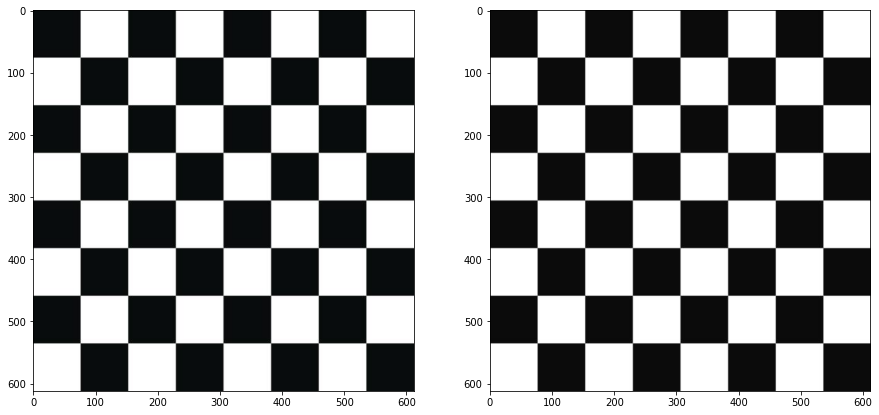

In [ ]:
img = cv2.imread('data/chessboard.jpg')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [ ]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [ ]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy

harris_response = detA - k * traceA ** 2

In [ ]:
img_gray.shape

(612, 612)

In [ ]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [ ]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

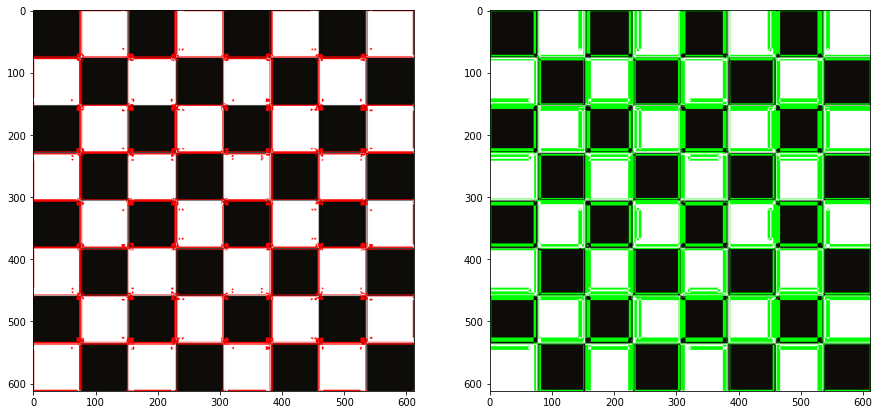

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")



---


---



## Challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve

/tmp/ipython-input-4270021746.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve
/tmp/ipython-input-4270021746.py:8: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


--- Procesando Imagen 1/3 ---


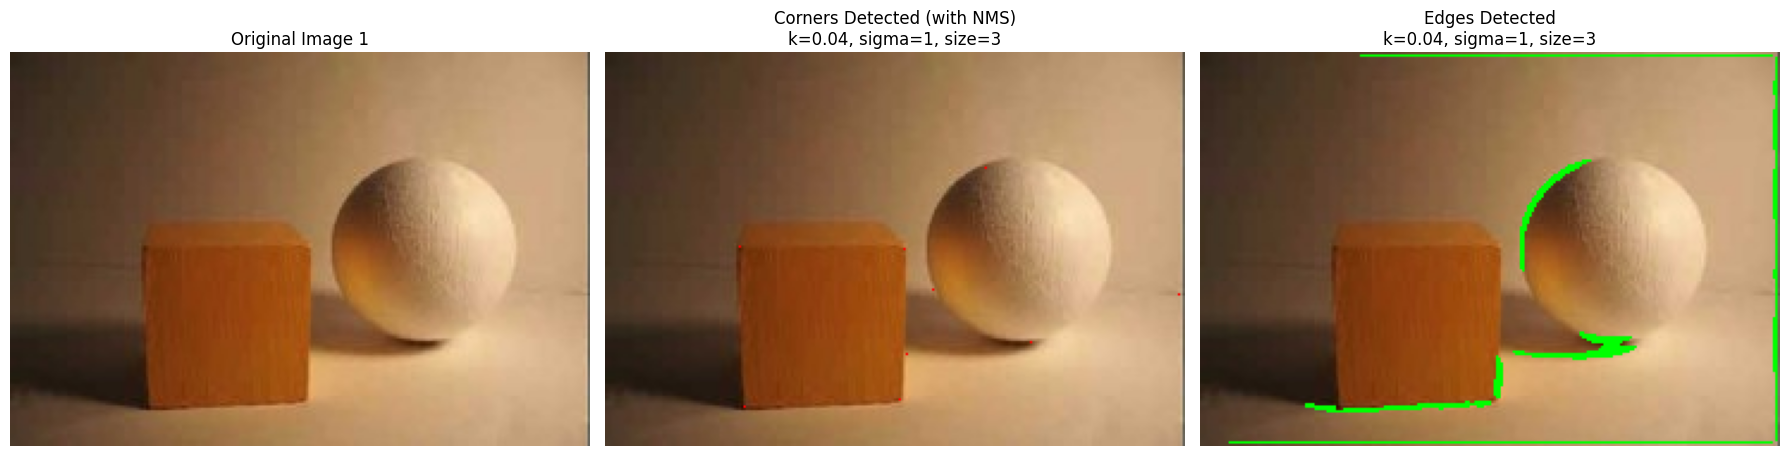

Analysis for Image 1 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 321356281.16, Min Harris Response (NMS) = -inf
Threshold used for corners: 3213562.81 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


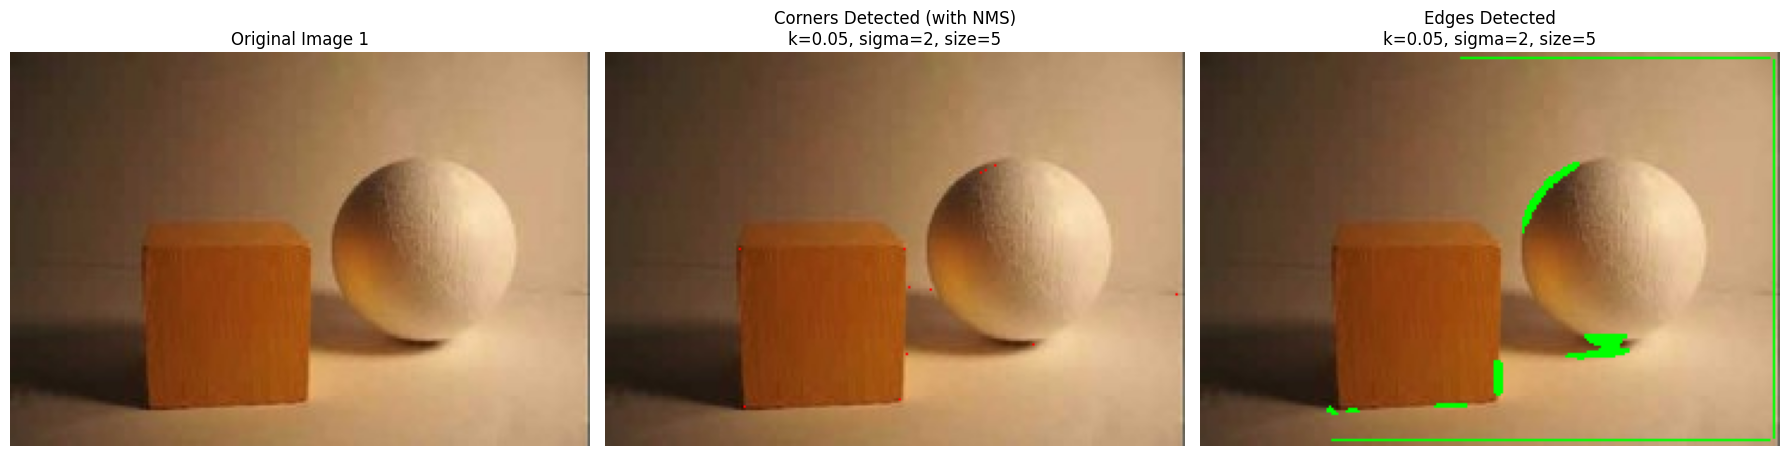

Analysis for Image 1 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5} (with NMS):
Max Harris Response (NMS) = 169397615.11, Min Harris Response (NMS) = -inf
Threshold used for corners: 1693976.15 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


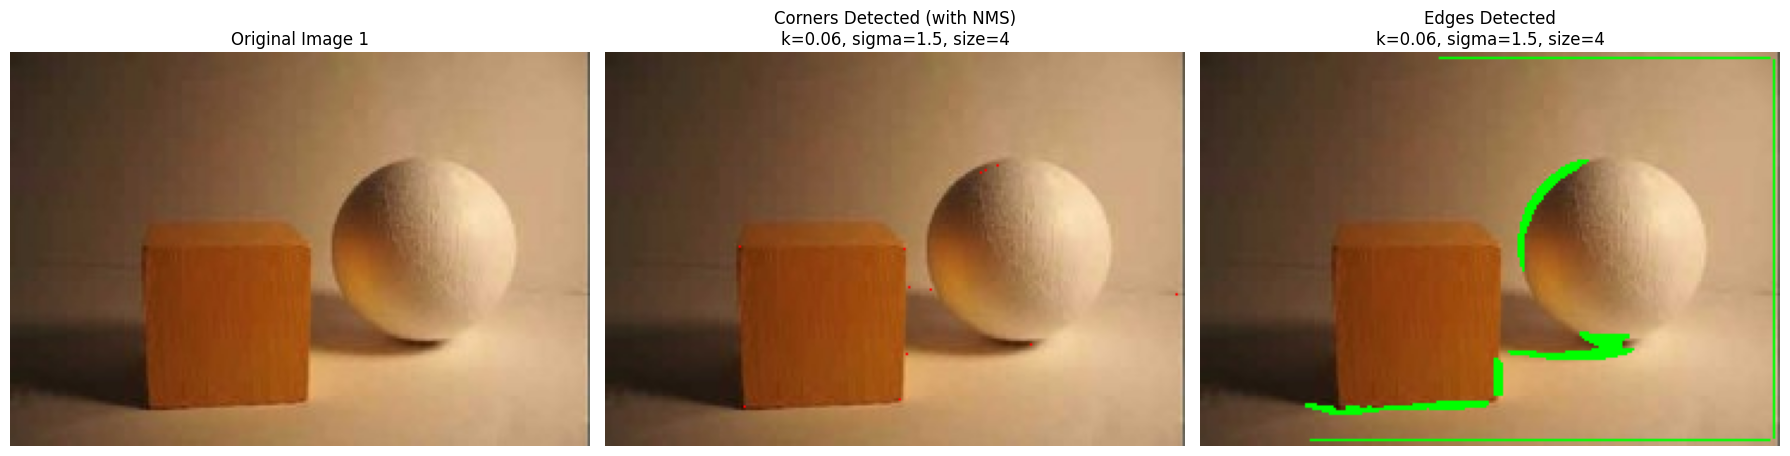

Analysis for Image 1 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 4} (with NMS):
Max Harris Response (NMS) = 269414547.96, Min Harris Response (NMS) = -inf
Threshold used for corners: 2694145.48 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


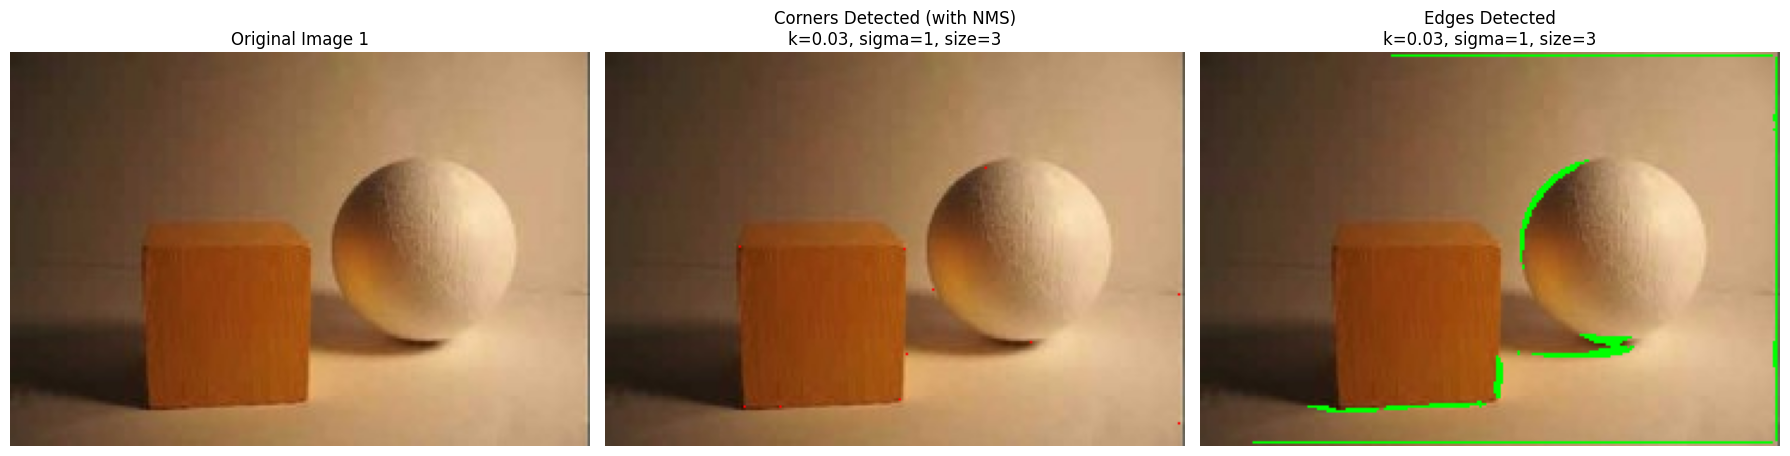

Analysis for Image 1 with parameters {'k': 0.03, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 368454034.51, Min Harris Response (NMS) = -inf
Threshold used for corners: 3684540.35 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


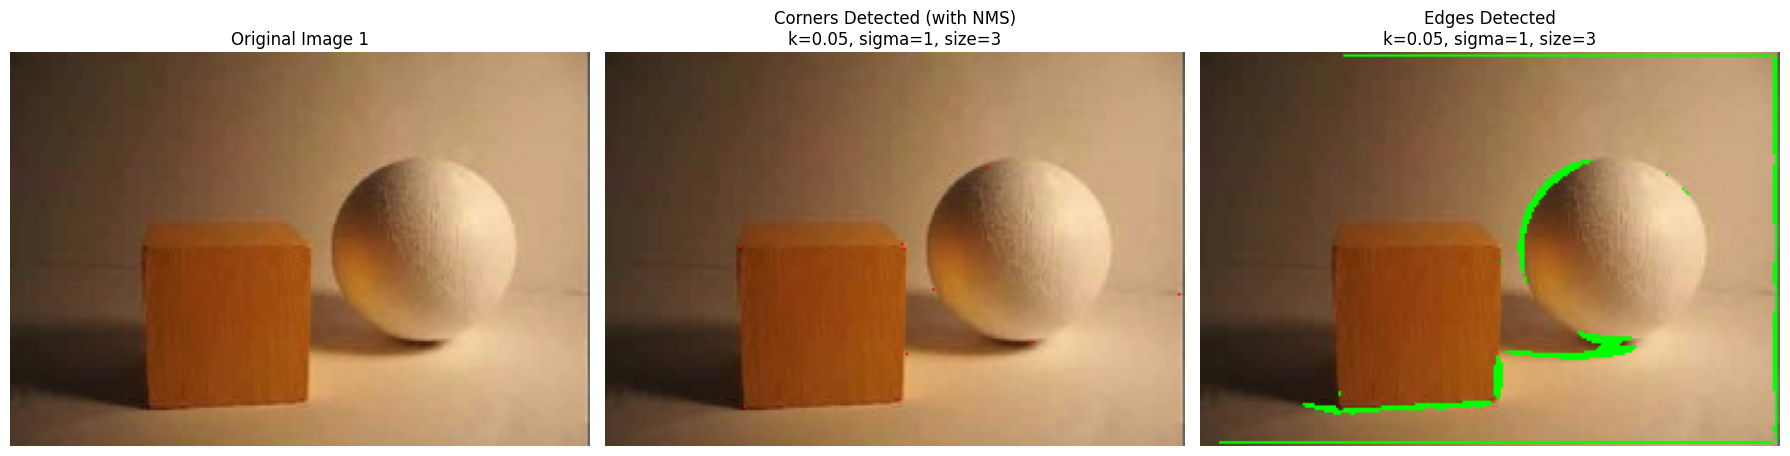

Analysis for Image 1 with parameters {'k': 0.05, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 276799761.47, Min Harris Response (NMS) = -inf
Threshold used for corners: 2767997.61 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


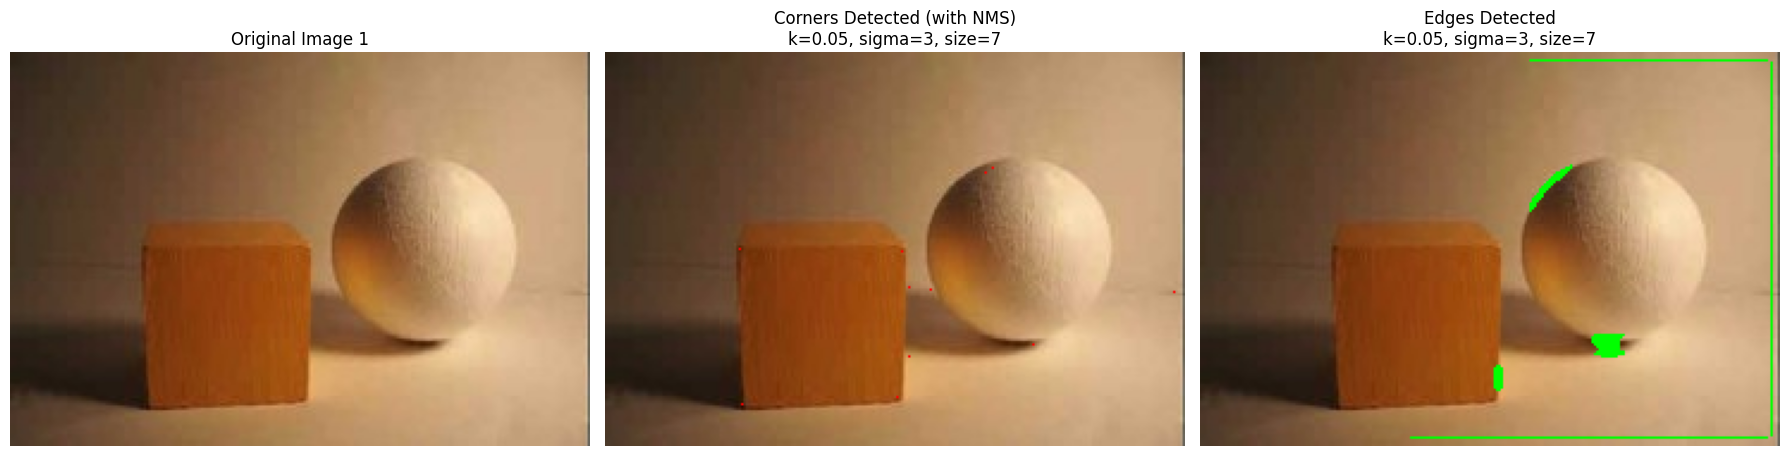

Analysis for Image 1 with parameters {'k': 0.05, 'gaussian_sigma': 3, 'gaussian_size': 7} (with NMS):
Max Harris Response (NMS) = 83284880.90, Min Harris Response (NMS) = -inf
Threshold used for corners: 832848.81 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


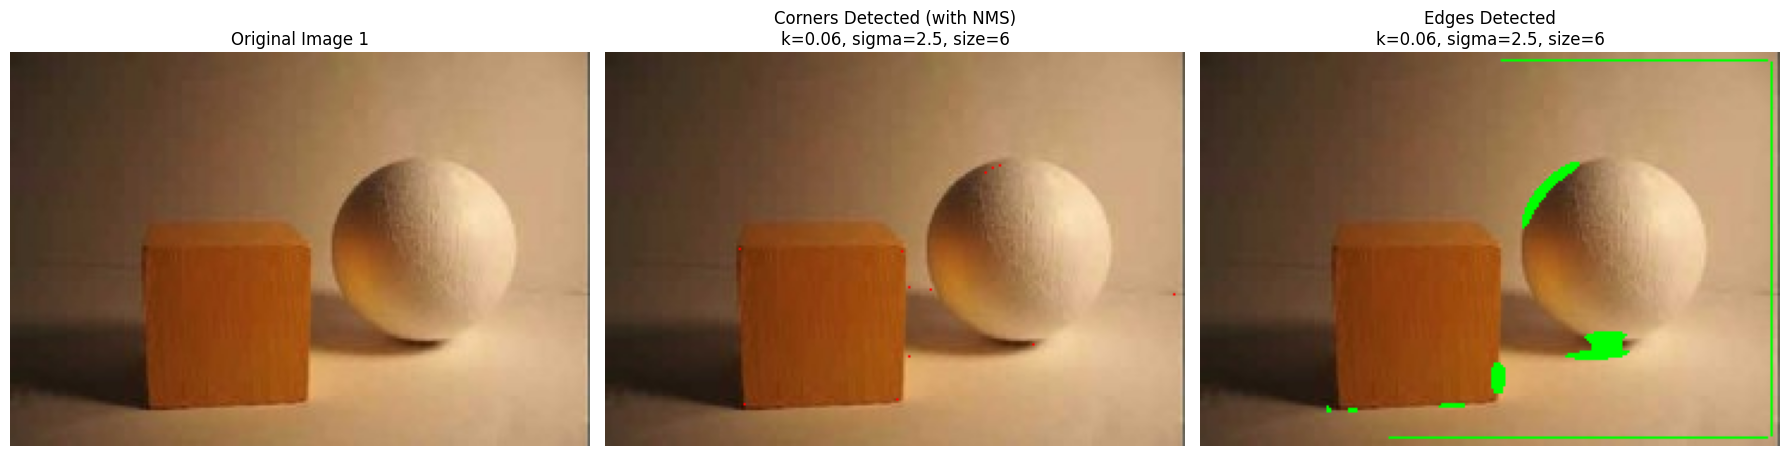

Analysis for Image 1 with parameters {'k': 0.06, 'gaussian_sigma': 2.5, 'gaussian_size': 6} (with NMS):
Max Harris Response (NMS) = 120857564.28, Min Harris Response (NMS) = -inf
Threshold used for corners: 1208575.64 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------
--- Procesando Imagen 2/3 ---


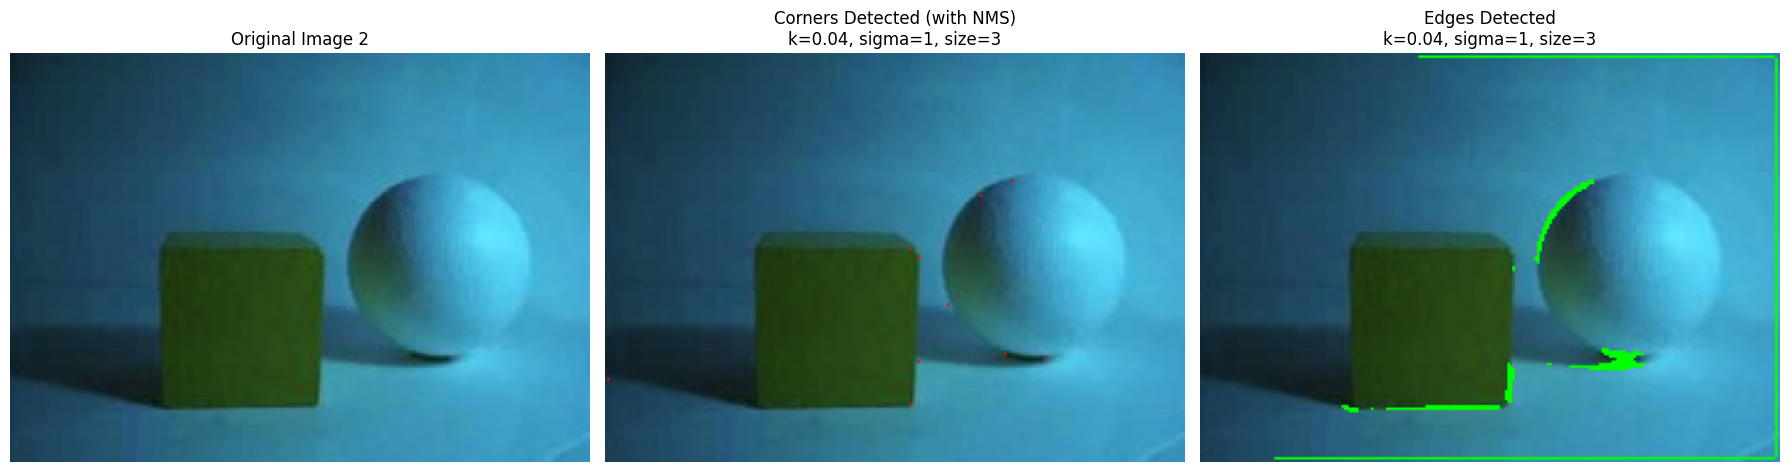

Analysis for Image 2 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 230849742.21, Min Harris Response (NMS) = -inf
Threshold used for corners: 2308497.42 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


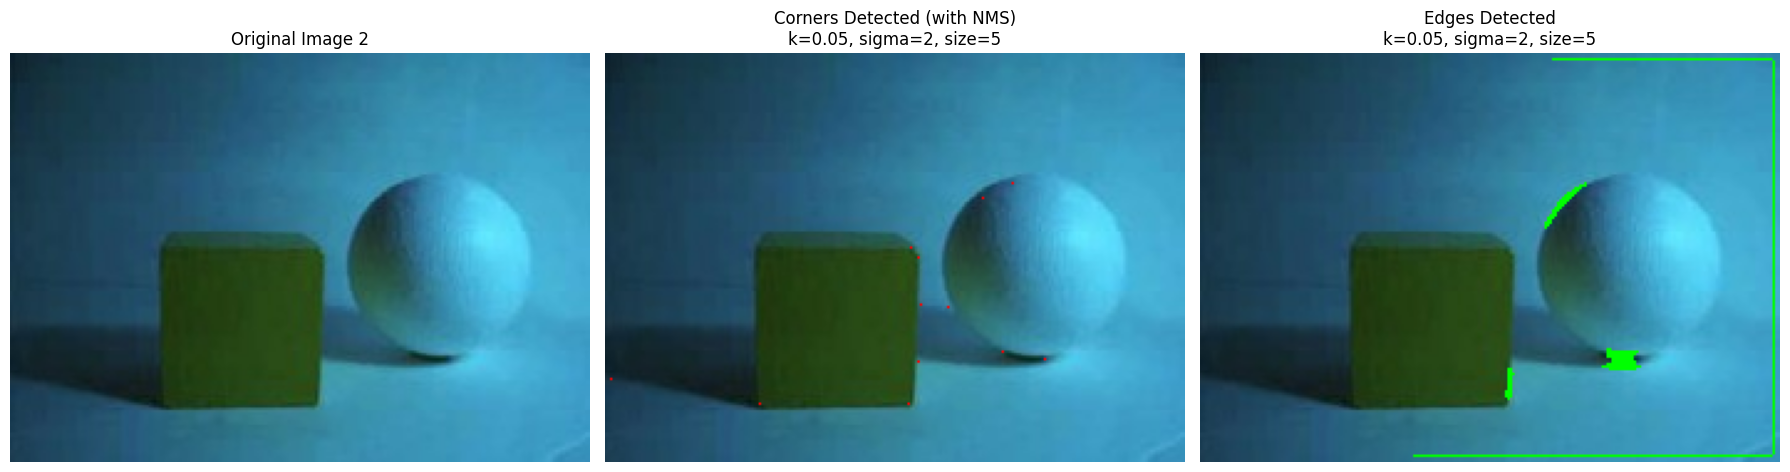

Analysis for Image 2 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5} (with NMS):
Max Harris Response (NMS) = 85956623.87, Min Harris Response (NMS) = -inf
Threshold used for corners: 859566.24 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


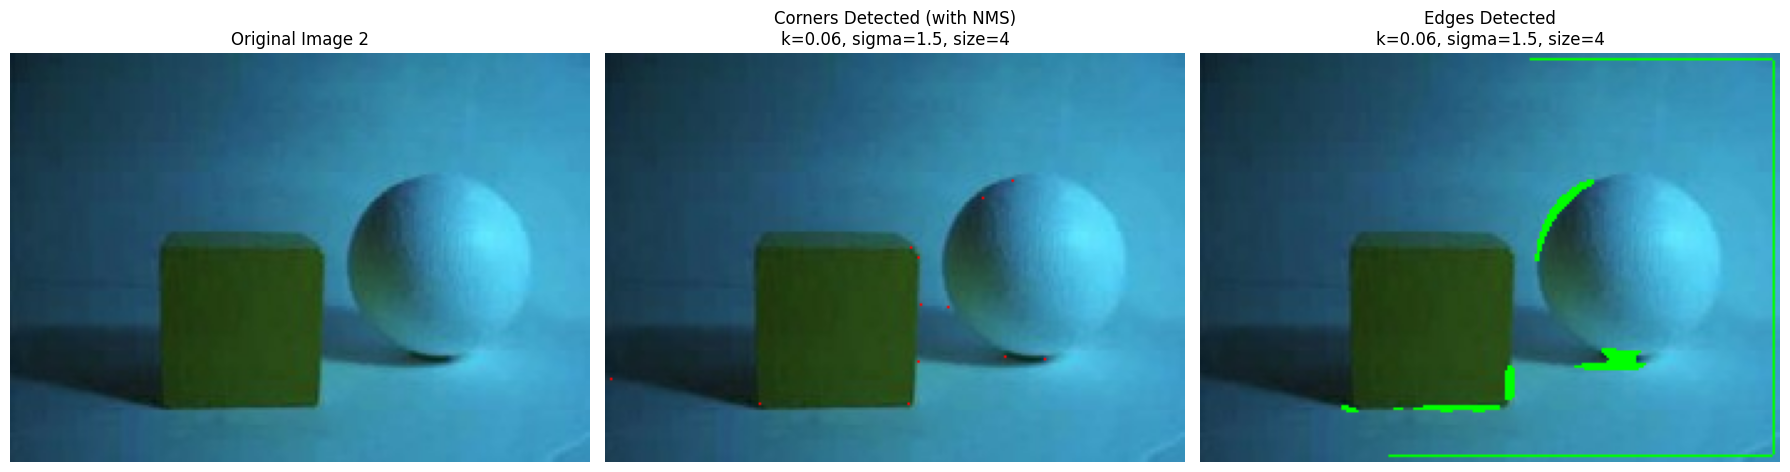

Analysis for Image 2 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 4} (with NMS):
Max Harris Response (NMS) = 153070720.38, Min Harris Response (NMS) = -inf
Threshold used for corners: 1530707.20 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


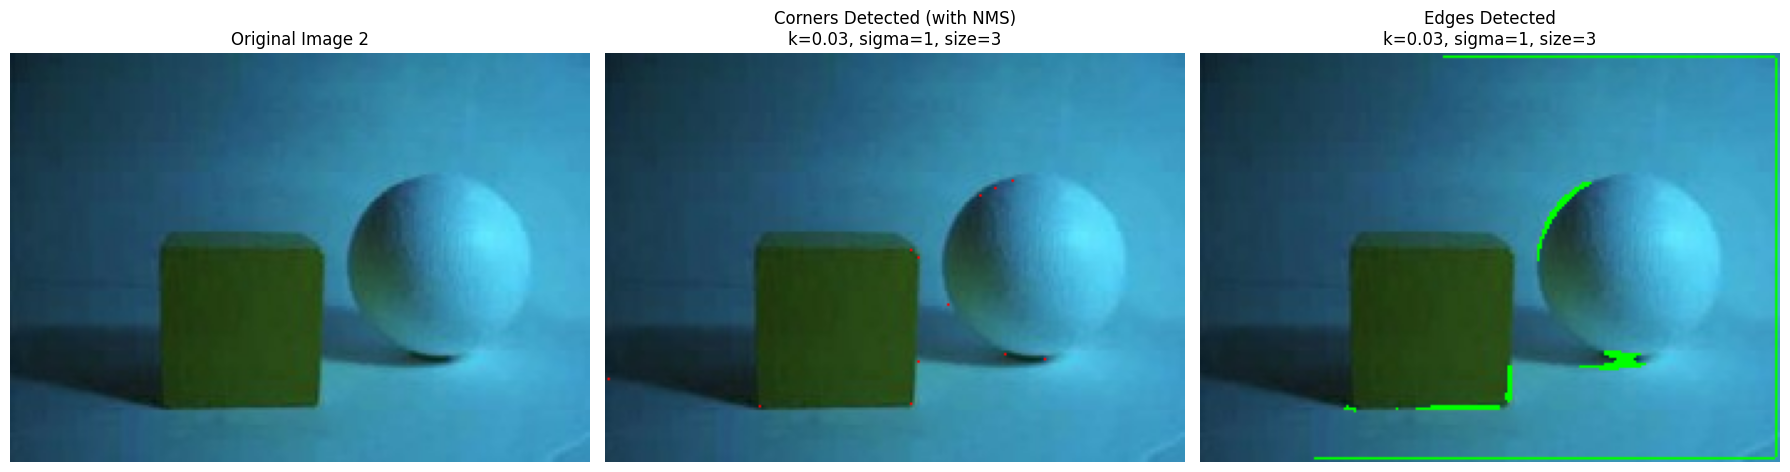

Analysis for Image 2 with parameters {'k': 0.03, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 245906040.63, Min Harris Response (NMS) = -inf
Threshold used for corners: 2459060.41 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


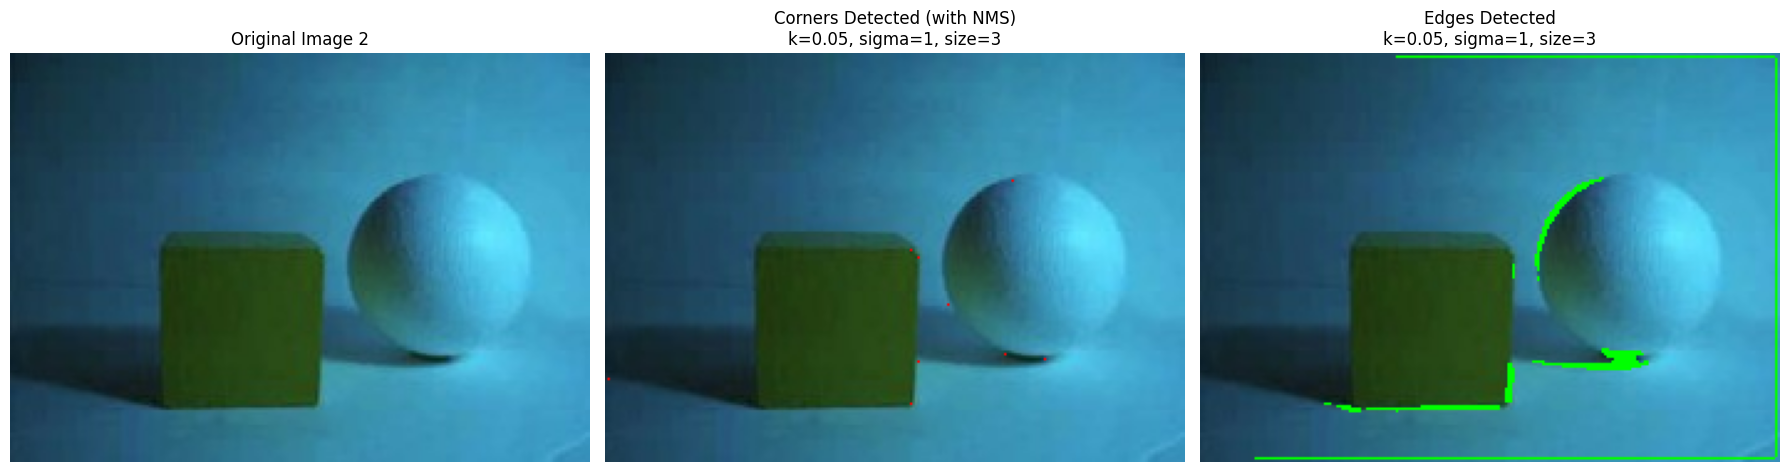

Analysis for Image 2 with parameters {'k': 0.05, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 215793443.80, Min Harris Response (NMS) = -inf
Threshold used for corners: 2157934.44 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


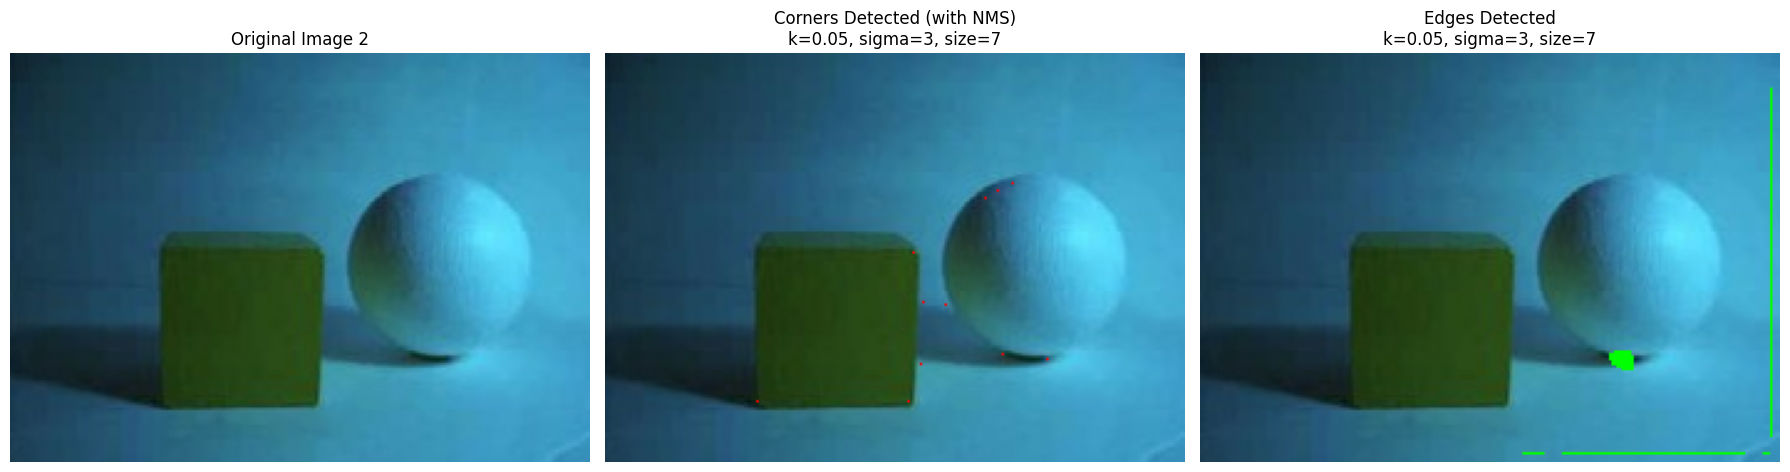

Analysis for Image 2 with parameters {'k': 0.05, 'gaussian_sigma': 3, 'gaussian_size': 7} (with NMS):
Max Harris Response (NMS) = 32851104.11, Min Harris Response (NMS) = -inf
Threshold used for corners: 328511.04 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


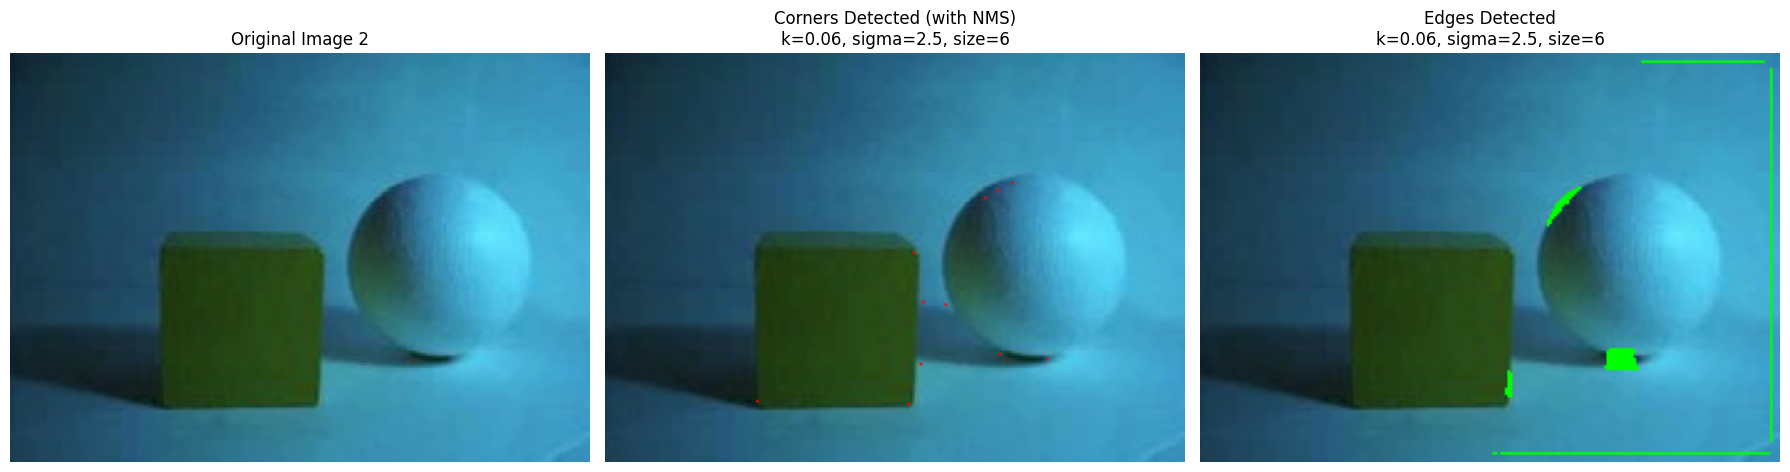

Analysis for Image 2 with parameters {'k': 0.06, 'gaussian_sigma': 2.5, 'gaussian_size': 6} (with NMS):
Max Harris Response (NMS) = 48590594.49, Min Harris Response (NMS) = -inf
Threshold used for corners: 485905.94 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------
--- Procesando Imagen 3/3 ---


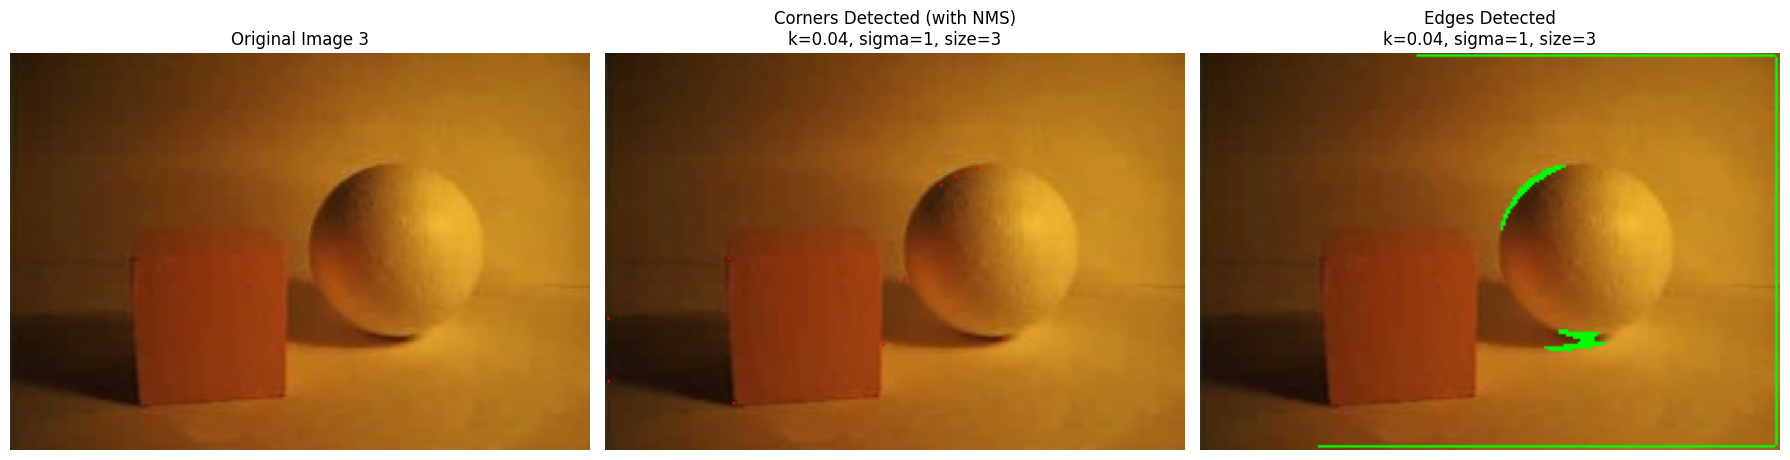

Analysis for Image 3 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 77008204.71, Min Harris Response (NMS) = -inf
Threshold used for corners: 770082.05 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


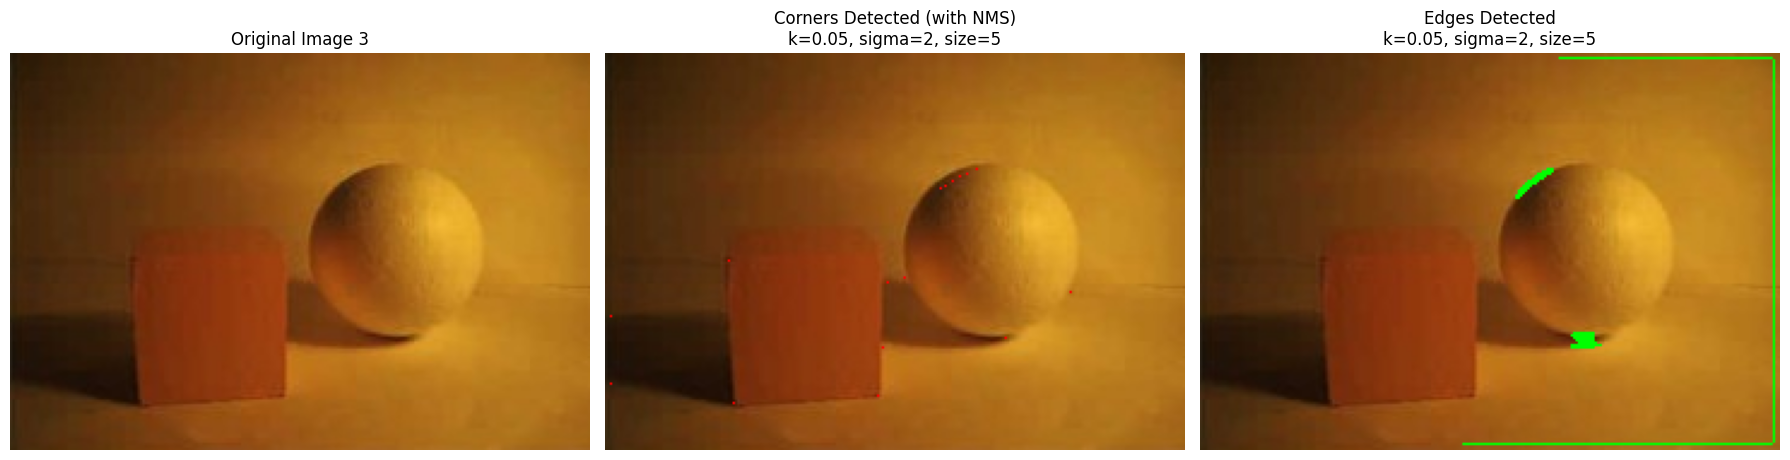

Analysis for Image 3 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5} (with NMS):
Max Harris Response (NMS) = 29962570.81, Min Harris Response (NMS) = -inf
Threshold used for corners: 299625.71 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


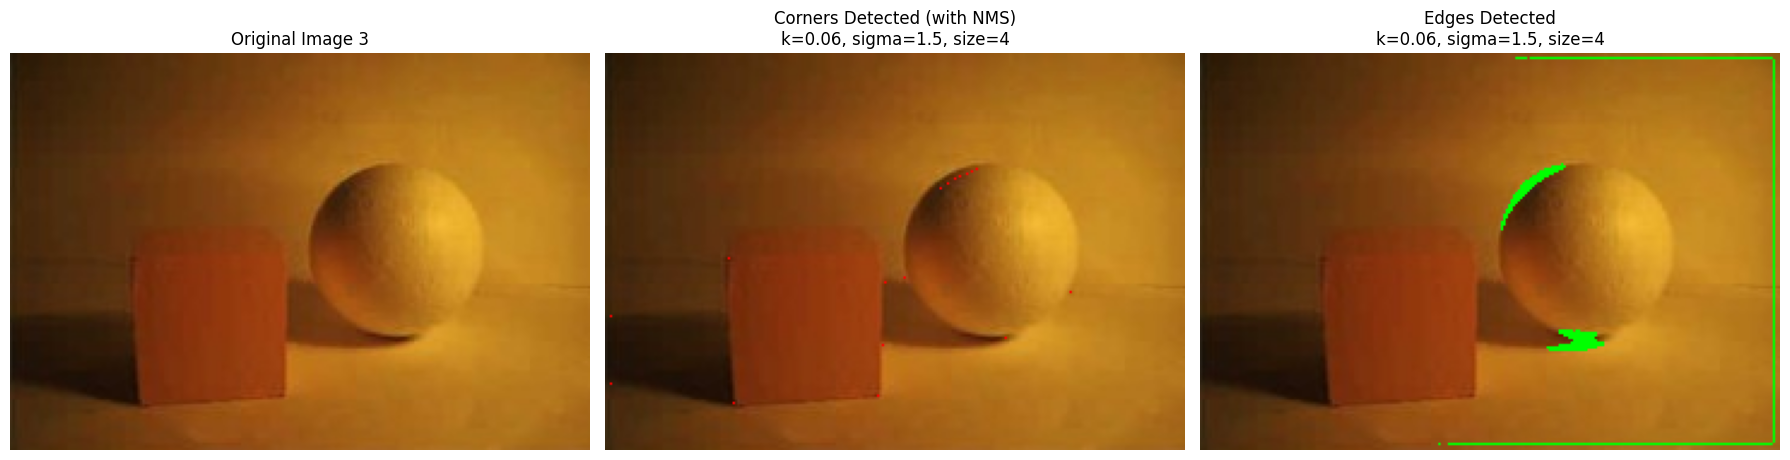

Analysis for Image 3 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 4} (with NMS):
Max Harris Response (NMS) = 48238627.63, Min Harris Response (NMS) = -inf
Threshold used for corners: 482386.28 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


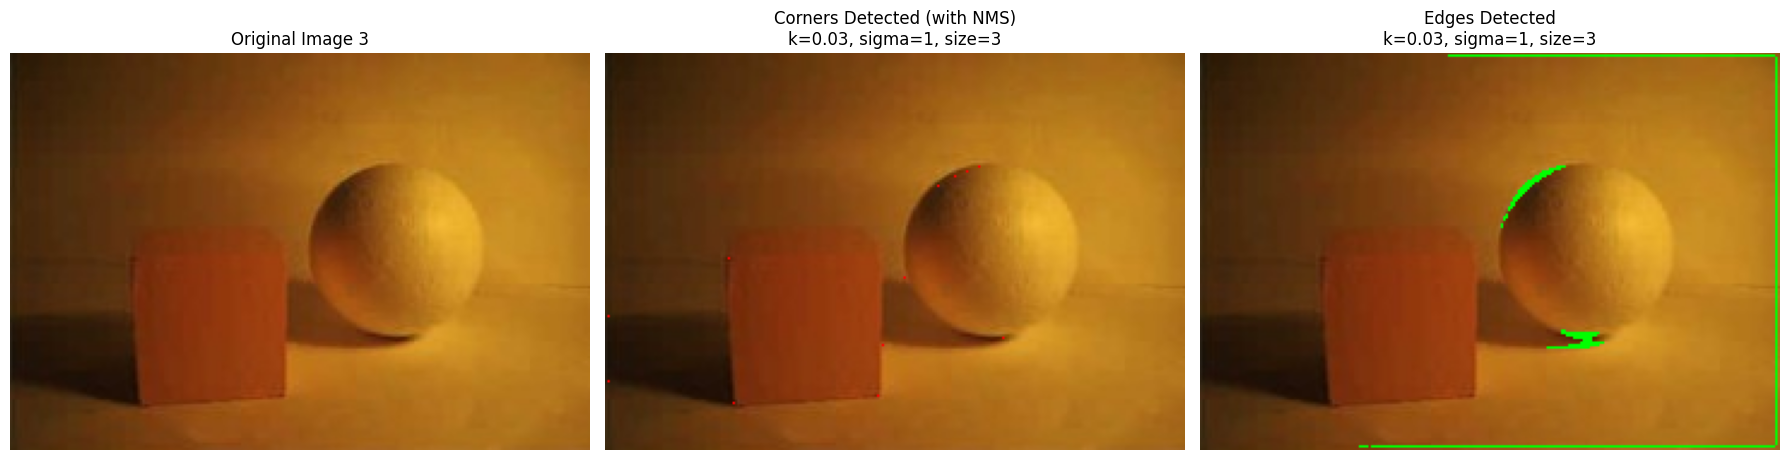

Analysis for Image 3 with parameters {'k': 0.03, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 87776914.16, Min Harris Response (NMS) = -inf
Threshold used for corners: 877769.14 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


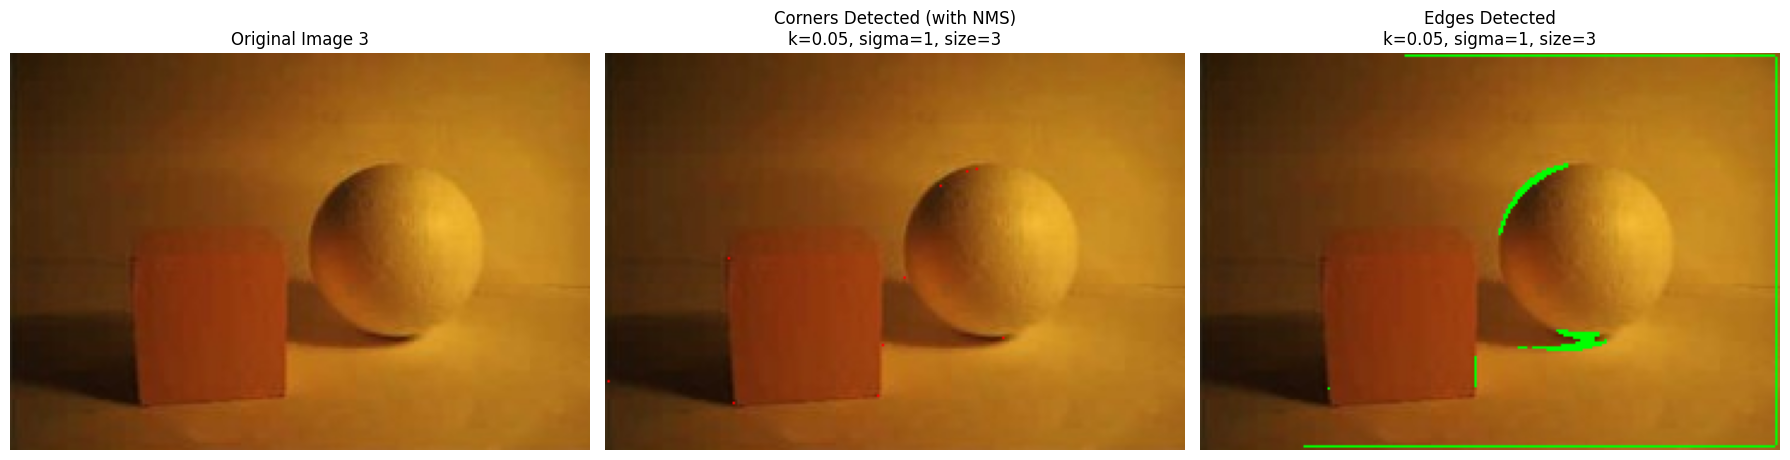

Analysis for Image 3 with parameters {'k': 0.05, 'gaussian_sigma': 1, 'gaussian_size': 3} (with NMS):
Max Harris Response (NMS) = 66239495.26, Min Harris Response (NMS) = -inf
Threshold used for corners: 662394.95 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


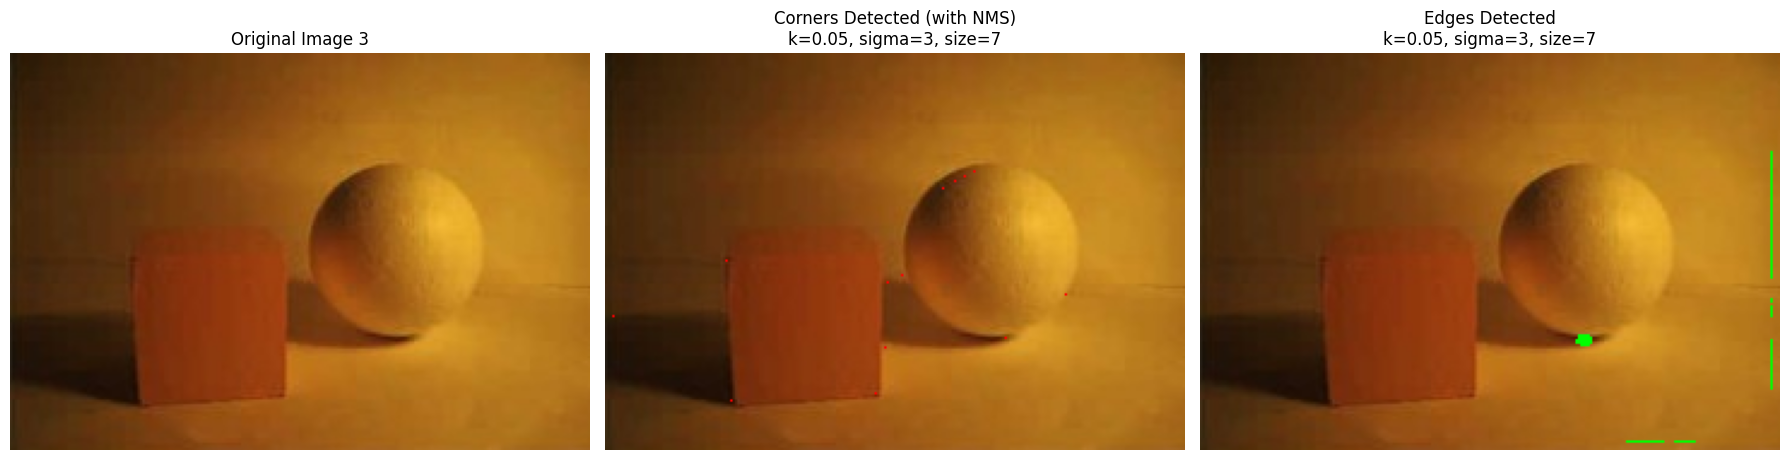

Analysis for Image 3 with parameters {'k': 0.05, 'gaussian_sigma': 3, 'gaussian_size': 7} (with NMS):
Max Harris Response (NMS) = 13580233.93, Min Harris Response (NMS) = -inf
Threshold used for corners: 135802.34 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


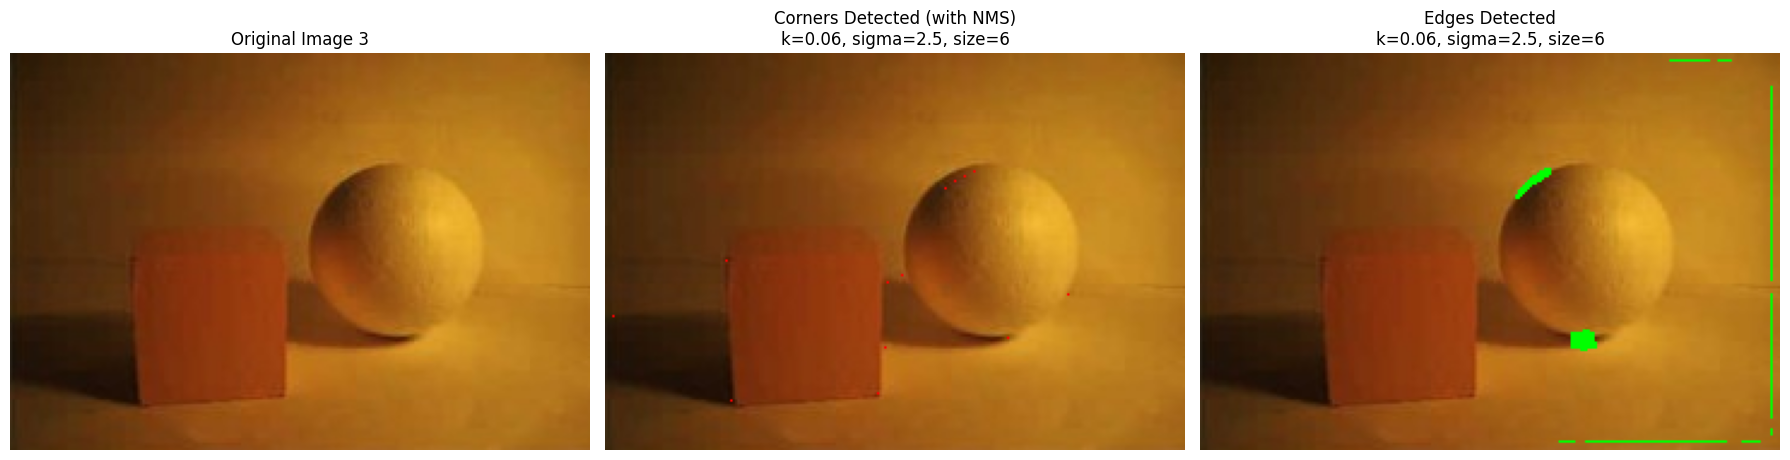

Analysis for Image 3 with parameters {'k': 0.06, 'gaussian_sigma': 2.5, 'gaussian_size': 6} (with NMS):
Max Harris Response (NMS) = 18108149.18, Min Harris Response (NMS) = -inf
Threshold used for corners: 181081.49 (1.00% of max)
Threshold used for edges: -10000000.00
NMS window size: 3
--------------------------------------------------


In [ ]:
# --- 1. Funciones Utilitarias ---

def gradient_x(imggray):
    """Calcula la derivada espacial en la dirección X usando el kernel de Sobel."""
    # Kernel de Sobel para X
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float64)
    # El modo 'same' asegura que la salida tenga el mismo tamaño que la entrada
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    """Calcula la derivada espacial en la dirección Y usando el kernel de Sobel."""
    # Kernel de Sobel para Y
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]], dtype=np.float64)
    return sig.convolve2d(imggray, kernel_y, mode='same')

def gaussian_kernel(size, sigma=1):
    """Genera un kernel Gaussiano 2D."""
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g

def non_max_suppression(harris_response, window_size):
    """
    Aplica la supresión de no-máximos para adelgazar la respuesta de Harris.
    Solo mantiene los picos locales en una ventana de 'window_size'.
    """
    suppressed_response = np.copy(harris_response)
    rows, cols = harris_response.shape
    offset = window_size // 2

    for r in range(offset, rows - offset):
        for c in range(offset, cols - offset):
            window = harris_response[r - offset : r + offset + 1,
                                     c - offset : c + offset + 1]
            # Si el píxel central no es el valor máximo en la ventana, se suprime.
            if harris_response[r, c] != np.max(window):
                suppressed_response[r, c] = -np.inf

    return suppressed_response

# --- 2. Función Principal del Detector de Harris ---

def harris_corner_detector(img_gray, k, sigma, size):
    """
    Implementa el algoritmo de Detección de Esquinas de Harris para una imagen
    y un conjunto de parámetros.
    """
    # 1. Cálculo de las derivadas espaciales
    I_x = gradient_x(img_gray)
    I_y = gradient_y(img_gray)

    # 2. Configuración del tensor de estructura M
    # Aplicar suavizado Gaussiano a los productos de las derivadas
    kernel = gaussian_kernel(size, sigma)
    Ixx = convolve(I_x**2, kernel)
    Ixy = convolve(I_y * I_x, kernel)
    Iyy = convolve(I_y**2, kernel)

    # 3. Cálculo de la respuesta de Harris (R)
    detA = Ixx * Iyy - Ixy**2
    traceA = Ixx + Iyy
    harris_response = detA - k * traceA**2

    return harris_response

# --- 3. Bucle de Experimentación y Visualización (mejorado) ---

# Define la lista de combinaciones de parámetros (se mantiene)
parameter_combinations = [
    {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3}, # Original combination 1
    {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5}, # Original combination 2
    {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 4}, # Original combination 3
    {'k': 0.03, 'gaussian_sigma': 1, 'gaussian_size': 3}, # Lower k, same sigma/size
    {'k': 0.05, 'gaussian_sigma': 1, 'gaussian_size': 3}, # Same k, lower sigma/size
    {'k': 0.05, 'gaussian_sigma': 3, 'gaussian_size': 7}, # Same k, higher sigma/size
    {'k': 0.06, 'gaussian_sigma': 2.5, 'gaussian_size': 6} # Higher k, different sigma/size
]

# List to store the results
harris_results = []
nms_window_size = 3
percentage_threshold = 0.01
edge_threshold_value = -1e7

# Bucle principal:
for img_index, img in enumerate(image_dataset):
    # Conversión a escala de grises y tipo float64
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
        original_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_gray = img.astype(np.float64)
        original_img_rgb = cv2.cvtColor(img_gray.astype(np.uint8), cv2.COLOR_GRAY2RGB)


    print(f"--- Procesando Imagen {img_index+1}/{len(image_dataset)} ---")

    for params in parameter_combinations:
        k = params['k']
        sigma = params['gaussian_sigma']
        size = params['gaussian_size']

        # Llama a la función principal
        harris_response = harris_corner_detector(img_gray, k, sigma, size)

        # 4. Supresión de No-Máximos
        harris_response_nms = non_max_suppression(harris_response, nms_window_size)

        # --- Limpieza de Bordes ---
        # El cálculo en los bordes puede ser ruidoso. Se pone a 0.
        border_size = max(1, size // 2)
        harris_response_nms[:border_size, :] = 0
        harris_response_nms[-border_size:, :] = 0
        harris_response_nms[:, :border_size] = 0
        harris_response_nms[:, -border_size:] = 0

        hr_edges = np.copy(harris_response)
        hr_edges[:border_size, :] = 0
        hr_edges[-border_size:, :] = 0
        hr_edges[:, :border_size] = 0
        hr_edges[:, -border_size:] = 0
        # ------------------------

        # 5. Aplicación de Umbrales y Visualización
        max_harris_response = np.max(harris_response_nms)
        min_harris_response = np.min(harris_response_nms)
        corner_threshold_value = percentage_threshold * max_harris_response

        # Copias para dibujar
        img_copy_for_corners = np.copy(original_img_rgb)
        img_copy_for_edges = np.copy(original_img_rgb)

        img_copy_for_corners[harris_response_nms > corner_threshold_value] = [255, 0, 0] # Rojo

        # Marcar Bordes (R < umbral negativo)
        img_copy_for_edges[hr_edges < edge_threshold_value] = [0, 255, 0] # Verde

        # 6. Mostrar Resultados
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(original_img_rgb)
        plt.title(f"Original Image {img_index+1}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(img_copy_for_corners)
        plt.title(f"Corners Detected (with NMS)\nk={k}, sigma={sigma}, size={size}")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(img_copy_for_edges)
        plt.title(f"Edges Detected\nk={k}, sigma={sigma}, size={size}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"Analysis for Image {img_index+1} with parameters {params} (with NMS):")
        print(f"Max Harris Response (NMS) = {max_harris_response:.2f}, Min Harris Response (NMS) = {min_harris_response:.2f}")
        print(f"Threshold used for corners: {corner_threshold_value:.2f} ({percentage_threshold*100:.2f}% of max)")
        print(f"Threshold used for edges: {edge_threshold_value:.2f}")
        print(f"NMS window size: {nms_window_size}")
        print("-" * 50)

        harris_results.append({
            'image_index': img_index,
            'parameters': params,
            'max_nms_response': max_harris_response
        })

--- Procesando Imagen 1/3 ---


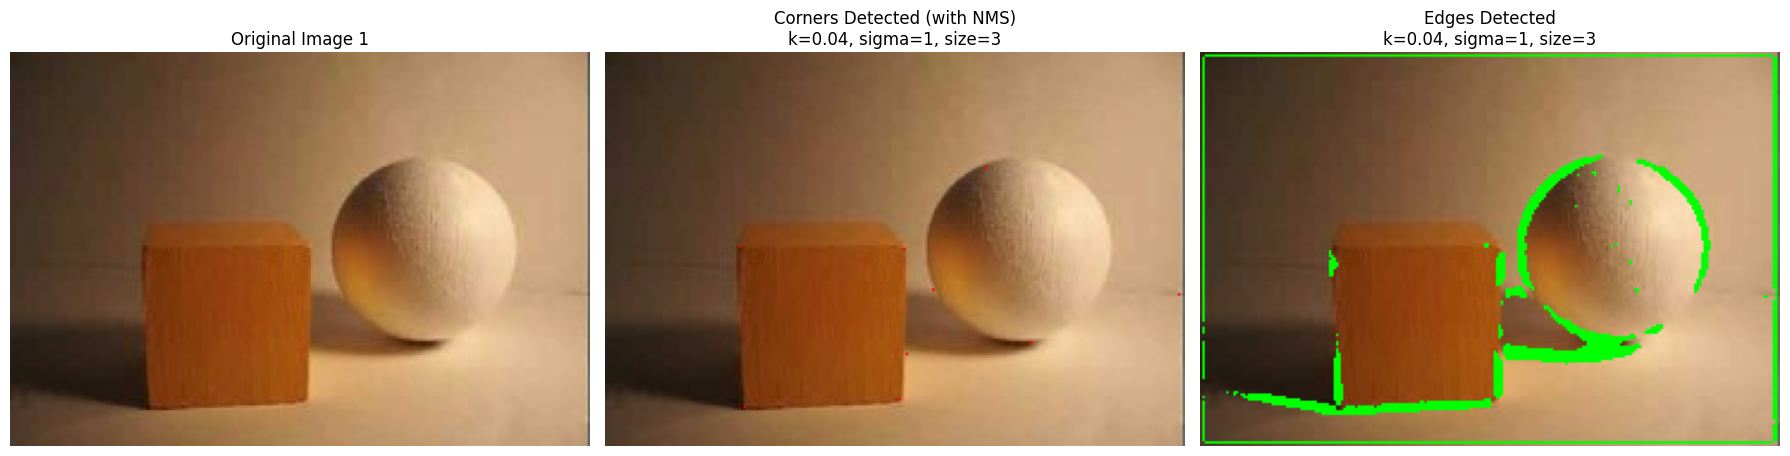

Analysis for Image 1 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3}:
Max Harris Response (NMS) = 321356281.16, Min Harris Response (NMS) = -inf
Threshold used for corners: 3213562.81 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


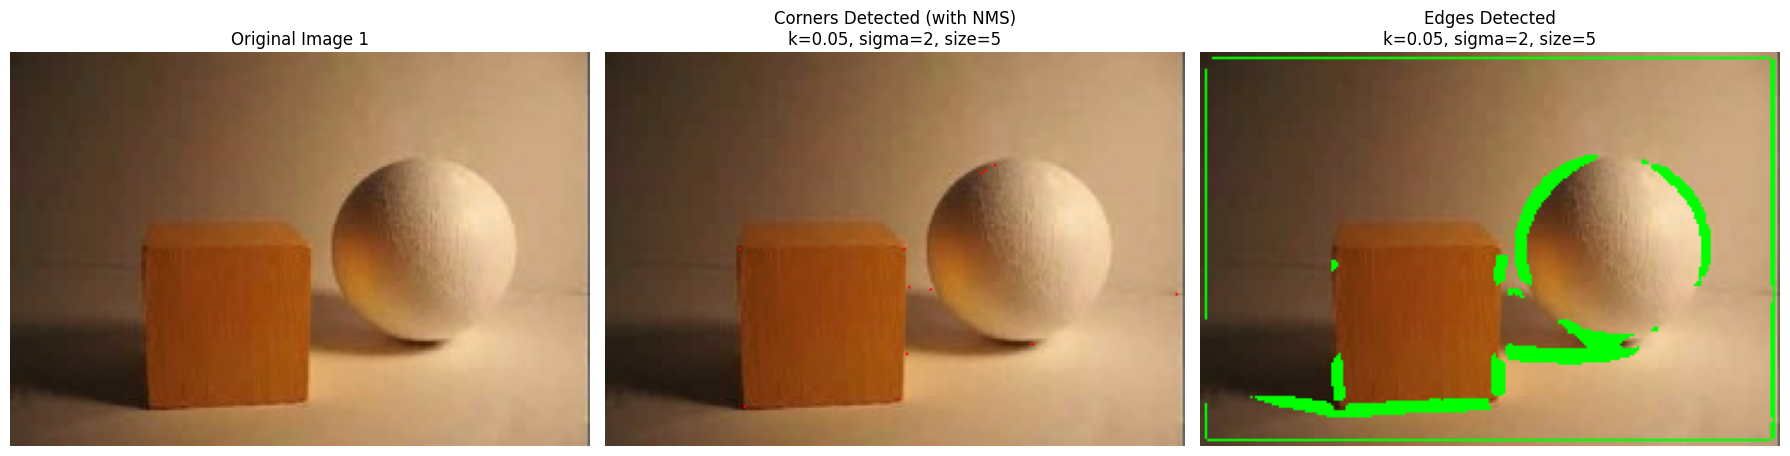

Analysis for Image 1 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5}:
Max Harris Response (NMS) = 169397615.11, Min Harris Response (NMS) = -inf
Threshold used for corners: 1693976.15 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


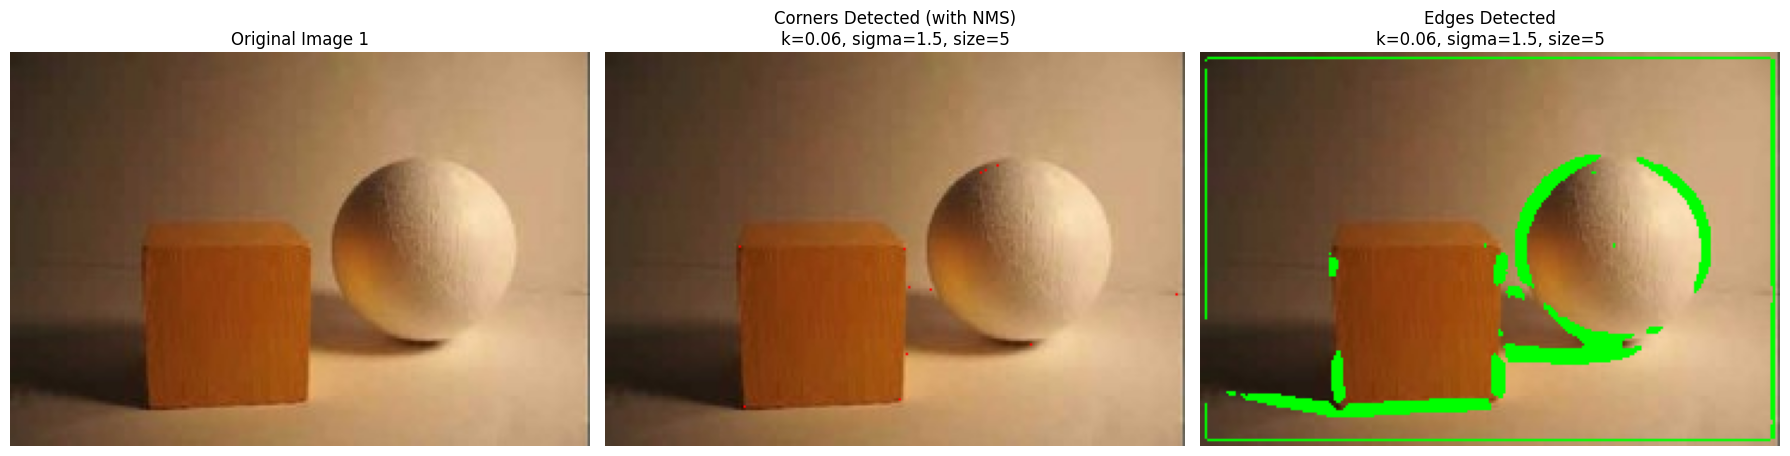

Analysis for Image 1 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 5}:
Max Harris Response (NMS) = 269414547.96, Min Harris Response (NMS) = -inf
Threshold used for corners: 2694145.48 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


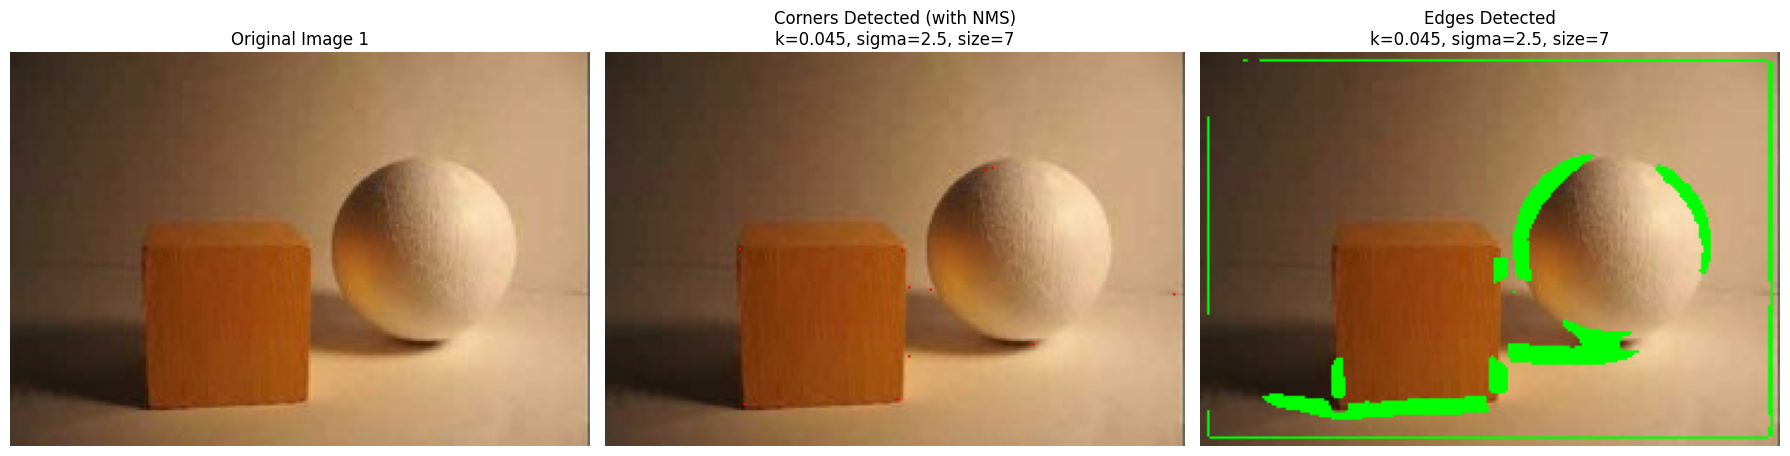

Analysis for Image 1 with parameters {'k': 0.045, 'gaussian_sigma': 2.5, 'gaussian_size': 7}:
Max Harris Response (NMS) = 145298625.13, Min Harris Response (NMS) = -inf
Threshold used for corners: 1452986.25 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------
--- Procesando Imagen 2/3 ---


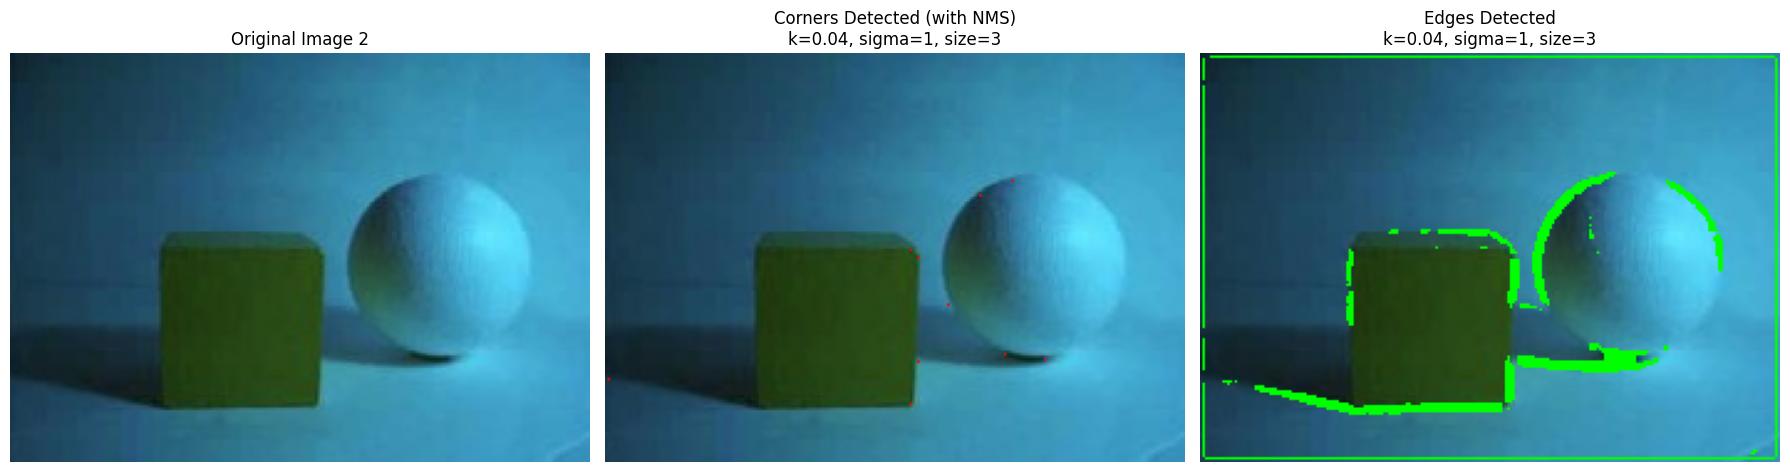

Analysis for Image 2 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3}:
Max Harris Response (NMS) = 230849742.21, Min Harris Response (NMS) = -inf
Threshold used for corners: 2308497.42 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


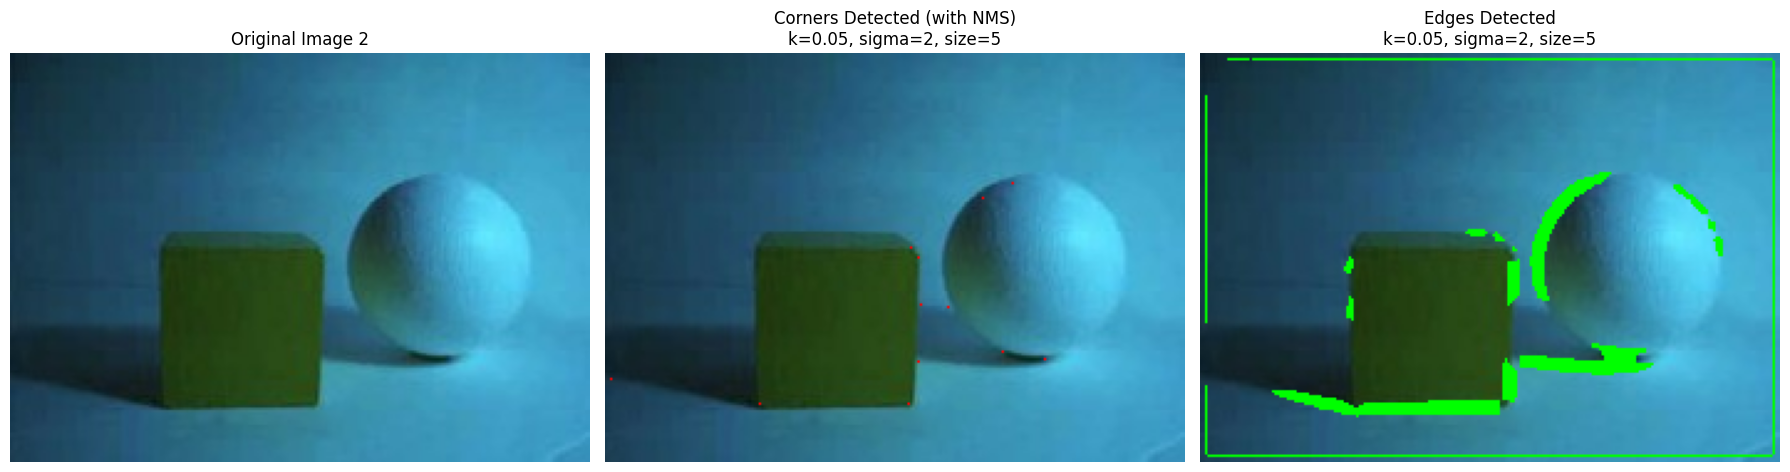

Analysis for Image 2 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5}:
Max Harris Response (NMS) = 85956623.87, Min Harris Response (NMS) = -inf
Threshold used for corners: 859566.24 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


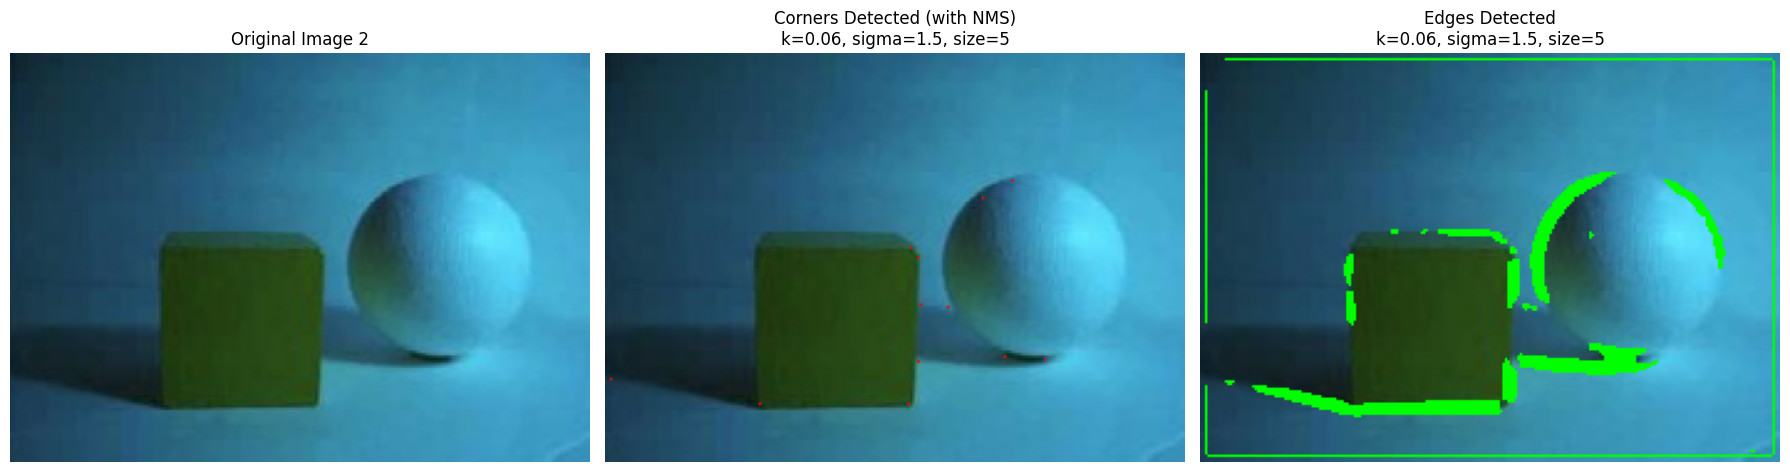

Analysis for Image 2 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 5}:
Max Harris Response (NMS) = 153070720.38, Min Harris Response (NMS) = -inf
Threshold used for corners: 1530707.20 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


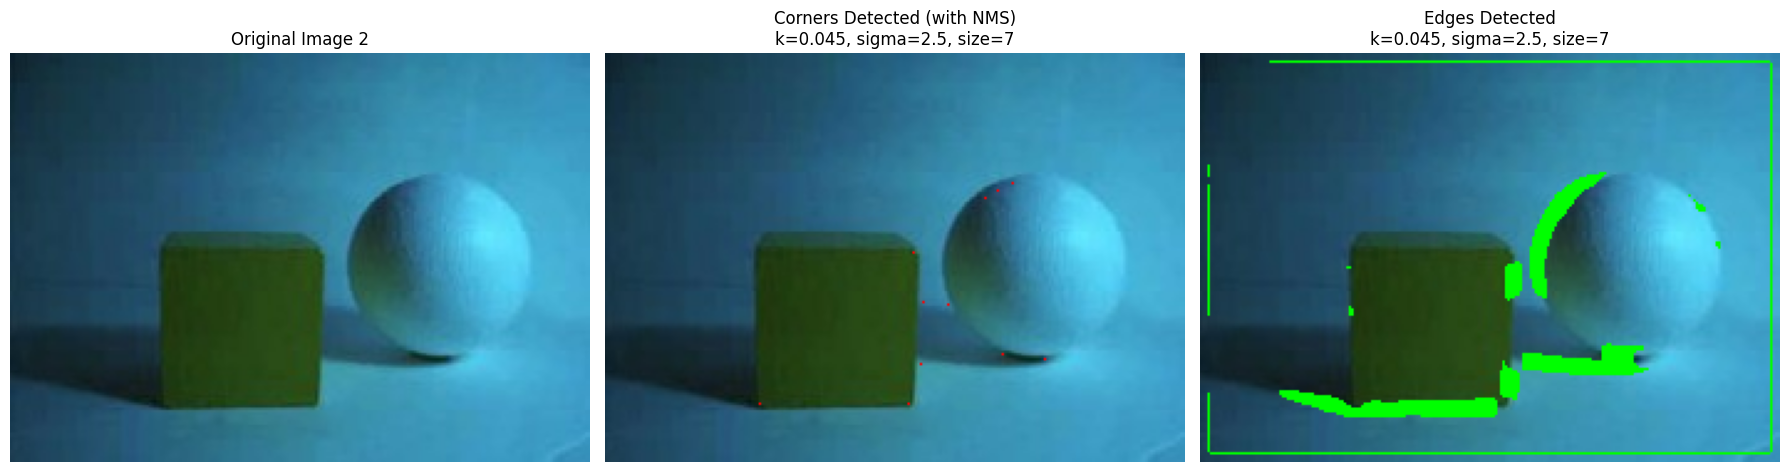

Analysis for Image 2 with parameters {'k': 0.045, 'gaussian_sigma': 2.5, 'gaussian_size': 7}:
Max Harris Response (NMS) = 60904809.69, Min Harris Response (NMS) = -inf
Threshold used for corners: 609048.10 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------
--- Procesando Imagen 3/3 ---


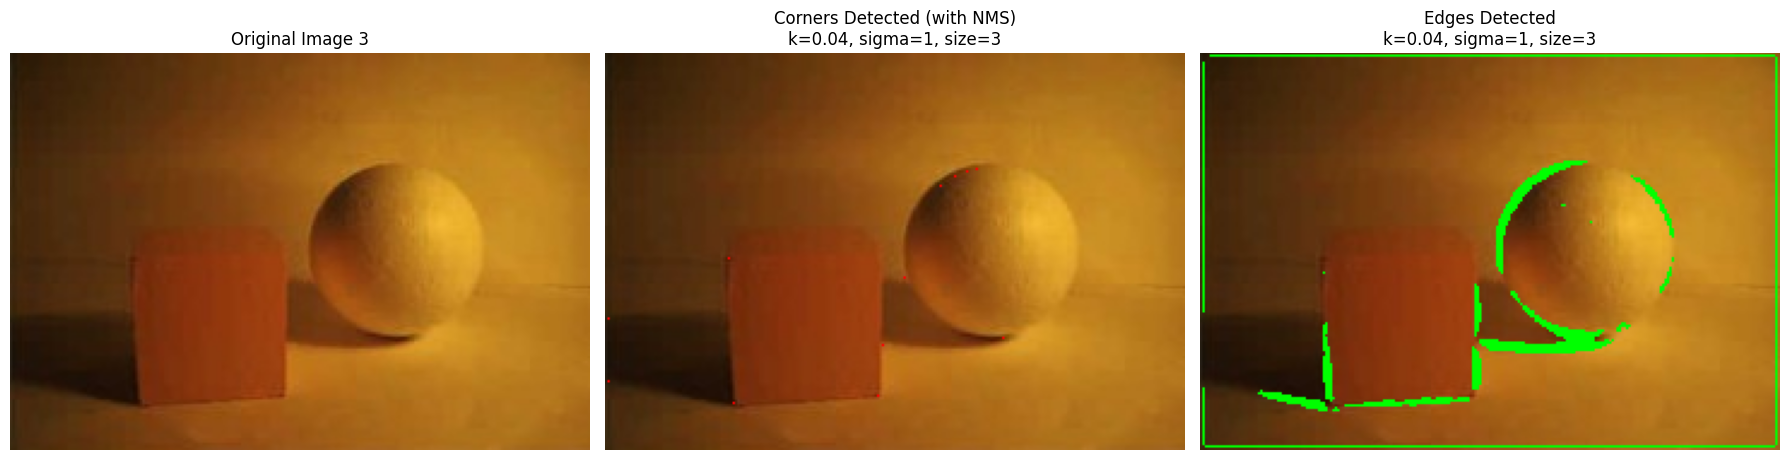

Analysis for Image 3 with parameters {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3}:
Max Harris Response (NMS) = 77008204.71, Min Harris Response (NMS) = -inf
Threshold used for corners: 770082.05 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


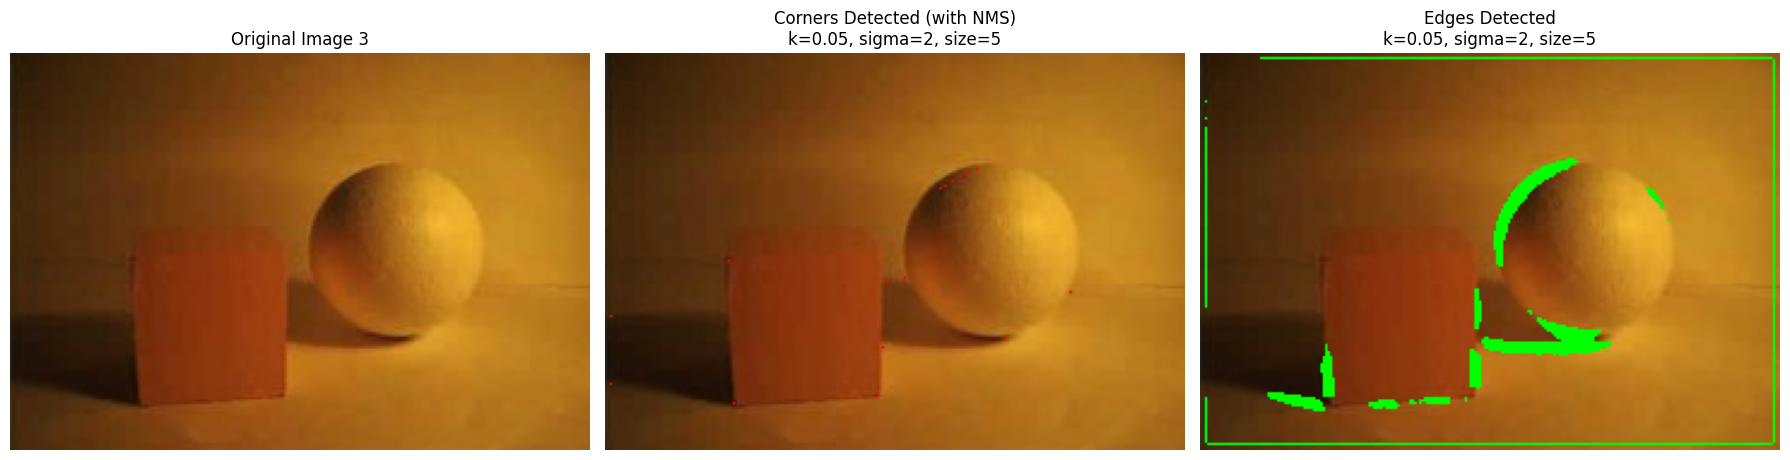

Analysis for Image 3 with parameters {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5}:
Max Harris Response (NMS) = 29962570.81, Min Harris Response (NMS) = -inf
Threshold used for corners: 299625.71 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


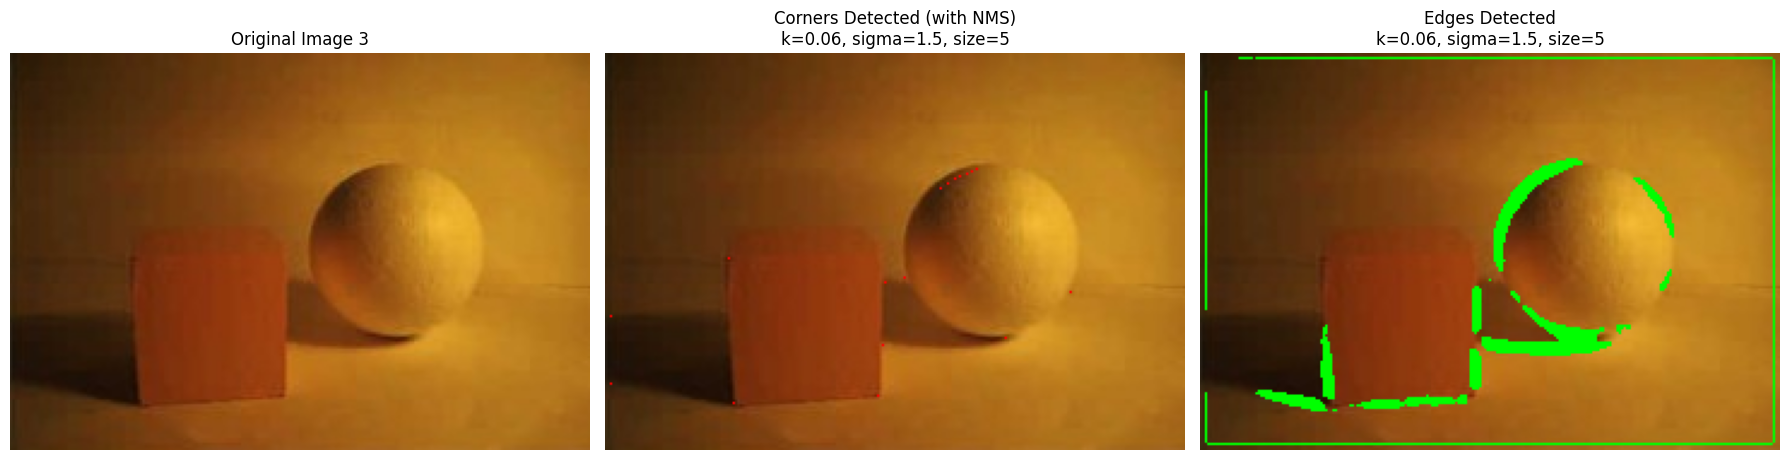

Analysis for Image 3 with parameters {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 5}:
Max Harris Response (NMS) = 48238627.63, Min Harris Response (NMS) = -inf
Threshold used for corners: 482386.28 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


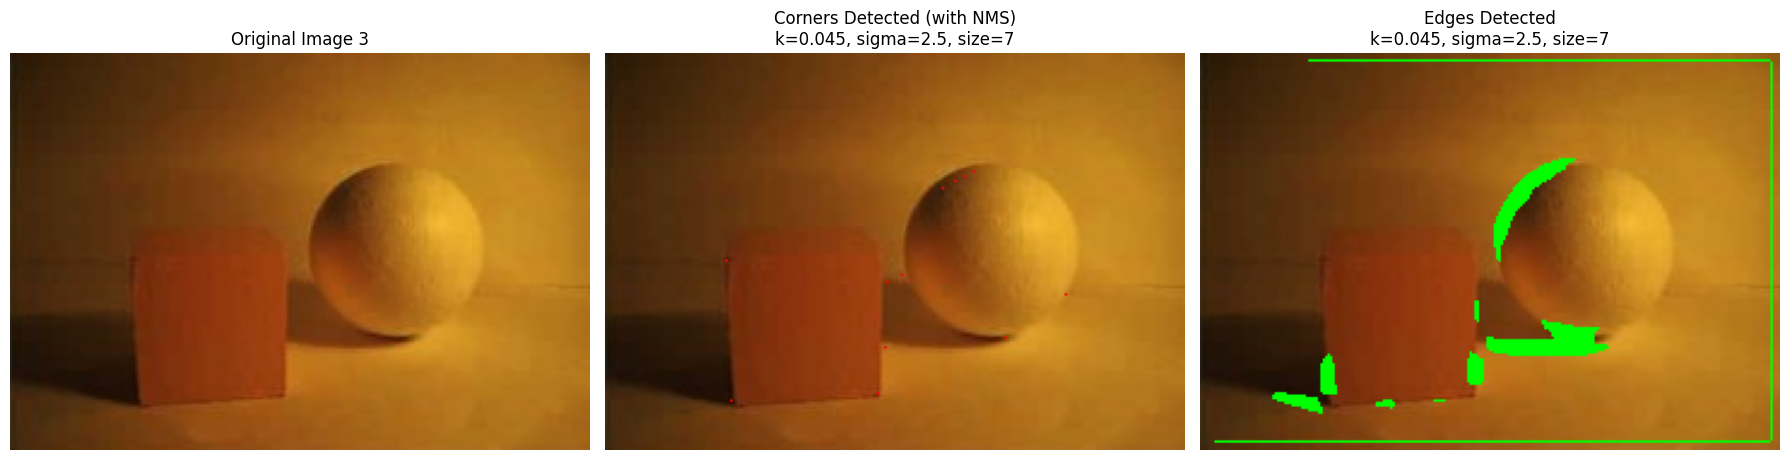

Analysis for Image 3 with parameters {'k': 0.045, 'gaussian_sigma': 2.5, 'gaussian_size': 7}:
Max Harris Response (NMS) = 25564090.43, Min Harris Response (NMS) = -inf
Threshold used for corners: 255640.90 (1.00% of max)
Threshold used for edges: -200000.00
NMS window size: 3
--------------------------------------------------


In [ ]:
# --- 1. Funciones Utilitarias ---

def gradient_x(imggray):
    """Calcula la derivada espacial en la dirección X usando el kernel de Sobel."""
    # Kernel de Sobel para X
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float64)
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    """Calcula la derivada espacial en la dirección Y usando el kernel de Sobel."""
    # Kernel de Sobel para Y
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]], dtype=np.float64)
    return sig.convolve2d(imggray, kernel_y, mode='same')

def gaussian_kernel(size, sigma=1):
    """Genera un kernel Gaussiano 2D."""
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g

def non_max_suppression(harris_response, window_size):
    """
    Aplica la supresión de no-máximos para adelgazar la respuesta de Harris.
    Solo mantiene los picos locales en una ventana de 'window_size'.
    """
    suppressed_response = np.copy(harris_response)
    rows, cols = harris_response.shape
    offset = window_size // 2

    for r in range(offset, rows - offset):
        for c in range(offset, cols - offset):
            window = harris_response[r - offset : r + offset + 1,
                                     c - offset : c + offset + 1]

            if harris_response[r, c] != np.max(window):
                suppressed_response[r, c] = -np.inf

    return suppressed_response

# --- 2. Función Principal del Detector de Harris ---

def harris_corner_detector(img_gray, k, sigma, size):
    """
    Implementa el algoritmo de Detección de Esquinas de Harris para una imagen
    y un conjunto de parámetros.
    """
    # 1. Cálculo de las derivadas espaciales
    I_x = gradient_x(img_gray)
    I_y = gradient_y(img_gray)

    # 2. Configuración del tensor de estructura M
    # Aplicar suavizado Gaussiano a los productos de las derivadas
    kernel = gaussian_kernel(size, sigma)
    Ixx = convolve(I_x**2, kernel)
    Ixy = convolve(I_y * I_x, kernel)
    Iyy = convolve(I_y**2, kernel)

    # 3. Cálculo de la respuesta de Harris (R)
    detA = Ixx * Iyy - Ixy**2
    traceA = Ixx + Iyy
    harris_response = detA - k * traceA**2

    return harris_response

# --- 3. Bucle de Experimentación y Visualización (mejorado) ---

parameter_combinations = [
    {'k': 0.04, 'gaussian_sigma': 1, 'gaussian_size': 3},
    {'k': 0.05, 'gaussian_sigma': 2, 'gaussian_size': 5},
    {'k': 0.06, 'gaussian_sigma': 1.5, 'gaussian_size': 5},
    {'k': 0.045, 'gaussian_sigma': 2.5, 'gaussian_size': 7}
]

harris_results = []
nms_window_size = 3
percentage_threshold_corners = 0.01
# **PARÁMETRO CLAVE AJUSTADO PARA BORDES**
fixed_edge_threshold_value = -2e5

# Bucle principal:
for img_index, img in enumerate(image_dataset):
    # Conversión a escala de grises y tipo float64
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
        original_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_gray = img.astype(np.float64)
        original_img_rgb = cv2.cvtColor(img_gray.astype(np.uint8), cv2.COLOR_GRAY2RGB)


    print(f"--- Procesando Imagen {img_index+1}/{len(image_dataset)} ---")

    for params in parameter_combinations:
        k = params['k']
        sigma = params['gaussian_sigma']
        size = params['gaussian_size']

        # Llama a la función principal
        harris_response = harris_corner_detector(img_gray, k, sigma, size)

        # 4. Supresión de No-Máximos
        harris_response_nms = non_max_suppression(harris_response, nms_window_size)

        # --- Limpieza de Bordes ---
        border_size = max(1, size // 2)
        harris_response_nms[:border_size, :] = 0
        harris_response_nms[-border_size:, :] = 0
        harris_response_nms[:, :border_size] = 0
        harris_response_nms[:, -border_size:] = 0

        hr_edges = np.copy(harris_response)
        hr_edges[:border_size, :] = 0
        hr_edges[-border_size:, :] = 0
        hr_edges[:, :border_size] = 0
        hr_edges[:, -border_size:] = 0
        # ------------------------

        # 5. Aplicación de Umbrales y Visualización
        max_harris_response = np.max(harris_response_nms)
        min_harris_response = np.min(harris_response_nms)
        corner_threshold_value = percentage_threshold_corners * max_harris_response
        edge_threshold_value = fixed_edge_threshold_value

        # Copias para dibujar
        img_copy_for_corners = np.copy(original_img_rgb)
        img_copy_for_edges = np.copy(original_img_rgb)

        img_copy_for_corners[harris_response_nms > corner_threshold_value] = [255, 0, 0]

        # Marcar Bordes (R < umbral negativo)
        img_copy_for_edges[hr_edges < edge_threshold_value] = [0, 255, 0] # Verde

        # 6. Mostrar Resultados
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(original_img_rgb)
        plt.title(f"Original Image {img_index+1}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(img_copy_for_corners)
        plt.title(f"Corners Detected (with NMS)\nk={k}, sigma={sigma}, size={size}")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(img_copy_for_edges)
        plt.title(f"Edges Detected\nk={k}, sigma={sigma}, size={size}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print(f"Analysis for Image {img_index+1} with parameters {params}:")
        print(f"Max Harris Response (NMS) = {max_harris_response:.2f}, Min Harris Response (NMS) = {min_harris_response:.2f}")
        print(f"Threshold used for corners: {corner_threshold_value:.2f} ({percentage_threshold_corners*100:.2f}% of max)")
        print(f"Threshold used for edges: {edge_threshold_value:.2f}")
        print(f"NMS window size: {nms_window_size}")
        print("-" * 50)

        harris_results.append({
            'image_index': img_index,
            'parameters': params,
            'max_nms_response': max_harris_response
        })

# Resultados y Conlcusiones

##Variancia del Detector de Harris:

El Detector de Harris (R) falla ante los cambios de luz y perspectiva porque su mecanismo se basa en la **magnitud absoluta** de los cambios de intensidad, una variable que es inestable en el mundo real.

---

## 1. El Fundamento Físico: La Variable Crítica

La única variable que Harris mide es el **Gradiente** ($\mathbf{I_x}$ e $\mathbf{I_y}$), que es una aproximación a la derivada y mide la **pendiente del brillo** en la imagen.

$$\text{Gradiente} \approx \frac{\text{Cambio en Intensidad}}{\text{Distancia}}$$

Si la pendiente es grande en dos direcciones (una esquina), se detecta un punto.

---

## 2. La Variancia por Iluminación

La variable $\mathbf{I_x}$ (el gradiente) es directamente proporcional a la intensidad de la luz.

### A. Explicación Matemática del Problema

Si la luz uniforme de la escena se multiplica por un factor $c$ (p. ej., se duplica), la intensidad de cada píxel ($I$) se multiplica por $c$. Esto tiene un efecto en cascada:

1.  **El Gradiente se Escala:** La pendiente del brillo también se escala linealmente por $c$

2.  **La Respuesta $R$ se Dispara:** Como la fórmula de Harris combina productos al cuadrado de los gradientes, el efecto se amplifica a la cuarta potencia:
    $$\mathbf{R' = c^4 \cdot R}$$

**Conclusión Educativa:** El detector no mide la *relación* de contraste (qué tan diferente es un píxel de otro), sino la *cantidad* absoluta de esa diferencia. Al duplicar la luz, la "cantidad de cambio" se multiplica por 16 ($2^4$), lo que hace que puntos débiles parezcan esquinas fuertes.

---

## 3. La Variancia por Perspectiva:

El detector es **invariante a la rotación 2D** (porque sus cálculos $R$ son independientes del ángulo de giro), pero es variante a los cambios de perspectiva (tomas inclinadas).

### A. La Variable que Cambia: La Proyección de la Estructura (Tensor $M$)

Una esquina real se proyecta en la imagen de manera diferente según el ángulo de la cámara (una **Transformación Afín**).

* **Efecto:** La fuerte pendiente de la esquina se diluye, y las direcciones de la pendiente (los ejes de la elipse de $M$) se distorsionan en la imagen proyectada.
* **Consecuencia:** El valor $R$ calculado para la esquina real **cambia radicalmente** entre una toma frontal y una toma inclinada.

**Conclusión:** Harris busca patrones de gradiente específicos. Si la perspectiva distorsiona la forma del patrón de la esquina, el detector ya no lo reconoce.

---

## Conclusión Final del Informe Técnico

**El Detector de Harris no es robusto para el trabajo en ambientes no controlados.**

| Tipo de Variancia | Variable Sensible | Impacto Crítico |
| :---: | :---: | :--- |
| **Iluminación** | **Magnitud del Gradiente** ($\mathbf{I_x, I_y}$) | Genera $\mathbf{Falsos Positivos}$ (por el factor $\mathbf{c^4}$). |
| **Perspectiva** | **Geometría de Proyección** (Tensor $M$) | Pierde el rastro de la característica real, generando $\mathbf{Falsos Negativos}$. |

Para aplicaciones exigentes, se requieren algoritmos que normalicen el brillo (evitando el $c^4$) y que sean invariantes a la escala y a la transformación afín.

## Referencias

- Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing (4ª ed., Global Edition). Pearson
- Lighting School. (s.f.). Understanding the light. Recuperado de https://www.lightingschool.eu/portfolio/understanding-the-light/